
# Introduction to the project

## Context

Incorporating advanced statistical analysis into our operations is crucial for staying competitive in the realm of American sports, particularly in the NBA. As technology continues to evolve, we recognize the importance of leveraging digital tracking tools to gather comprehensive data on player performance. By focusing on shot frequency and shooting efficiency among top NBA players, as identified by ESPN, we aim to gain valuable insights that can inform our strategic decisions and enhance our team's performance on the court. This project aligns with our commitment to utilizing data-driven approaches to drive success in the highly competitive landscape of professional basketball.

From a technical point of view:

This project entails harnessing cutting-edge digital tracking tools to capture real-time data on player movements during NBA games. We will employ sophisticated statistical analysis techniques to process the vast amount of information collected, focusing on shot frequency and shooting efficiency across various game situations and court locations. Additionally, predictive modeling techniques will be utilized to estimate the probability of shot success for each of the 20 esteemed NBA players included in the dataset. By leveraging advanced analytics and machine learning algorithms, we aim to extract actionable insights that can optimize player performance and inform strategic decision-making within our organization.

From an economic point of view:

Investing in this project holds significant economic potential for our organization within the sports industry. By leveraging data analytics to understand player performance and optimize strategic decision-making, we can gain a competitive edge on the court. Improved shot selection and efficiency among our players can lead to increased game success, fan engagement, and ultimately, revenue generation through ticket sales, merchandise, and sponsorships. Additionally, by demonstrating our commitment to data-driven approaches, we enhance our brand reputation and attract top talent, further bolstering our long-term economic viability and success in the market.

From a scientific point of view:

This project represents an opportunity to advance the scientific understanding of basketball performance through rigorous data analysis and predictive modeling. By examining shot data from top NBA players in various game contexts, we aim to uncover underlying patterns and trends that contribute to successful outcomes on the court. Through the application of statistical methods and machine learning algorithms, we can identify key factors influencing shot selection and effectiveness, contributing to the broader body of knowledge in sports analytics. Moreover, the insights gained from this research have the potential to inform coaching strategies, player development programs, and future scientific inquiries into sports performance optimization.

# Understanding and manipulation of data

## Framework

For this project, we utilized the NBA shot dataset spanning the years 1997 to 2020. The dataset contains comprehensive information on shot locations in NBA games, allowing for detailed analysis of shot frequency and efficiency among players during this period.

The dataset used in this project is freely available on Kaggle (https://www.kaggle.com/jonathangmwl/nba-shot-locations), a platform known for hosting various datasets for analysis and machine learning tasks. As such, it is accessible to anyone with an internet connection and an account on the Kaggle platform. The dataset is provided by the user "jonathangmwl" and can be accessed without any restrictions.

The dataset encompasses a considerable amount of data, capturing detailed shot information from NBA games spanning a 23-year period, ranging from 1997 to 2020. The exact size of the dataset, including the number of rows and columns, will be explored further in subsequent topics.

## Relevance

The dataset contains a comprehensive array of features that encapsulate various aspects of shot-taking behavior in NBA games. Here's a brief description of the key features included, along with their relevance for the classification problem:

Game-related features: Unique identifiers for each game, including game ID, event ID, and date of the game. While these features provide contextual information about when and where shots were taken, they are not directly relevant to the classification problem. However, they may indirectly influence player performance due to factors such as fatigue or opponent strength.

Player-related features: Unique identifiers for players, as well as their full names. While player identity is crucial for tracking individual performance, it may not directly impact the shot classification task unless specific player tendencies are considered in the modeling process.

Team-related features: Unique identifiers for teams participating in the game, including home and away teams. Similar to game-related features, team information provides contextual background but may not directly influence shot outcomes.

Shot-related features: Details about each shot taken, such as shot type (e.g., jump shot, layup), shot distance, shot zone (basic and area), shot zone range, and X-Y coordinates of shot location. These features are highly relevant for the classification problem as they directly characterize the shot-taking behavior of players. Shot type, distance, and location are likely to significantly influence the likelihood of a shot being successful, making them crucial predictors in the classification model.

Other features: Period of the game, minutes and seconds remaining in the period, season type (regular season or playoffs). While these features provide additional context about the game situation, their direct relevance to shot classification may be limited compared to shot-related features. However, game context, such as time remaining or playoff status, could indirectly influence shot outcomes by affecting player behavior or defensive strategies.

In summary, shot-related features, including shot type, distance, and location, are the most relevant predictors for the classification problem, as they directly characterize the shot-taking behavior of NBA players. Other contextual features, such as game-related and team-related features, may provide additional background information but are not as directly influential in predicting shot outcomes.

## Problem Definition

We aim to predict the probability of a shot being made by each player, indicating whether a shot is successful or not. This problem naturally aligns with a binary classification task, where shots are categorized as either made or missed.

# Pre-processing and feature engineering

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Read the dataset into a DataFrame
df = pd.read_csv('NBA Shot Locations 1997 - 2020.csv')

Check the size of the dataset (number of rows and columns):

In [3]:
print("Dataset Size:", df.shape)

Dataset Size: (4729512, 22)


Display the first few rows of the dataset:

In [4]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


Get the structure of the dataset:

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Game ID            int64 
 1   Game Event ID      int64 
 2   Player ID          int64 
 3   Player Name        object
 4   Team ID            int64 
 5   Team Name          object
 6   Period             int64 
 7   Minutes Remaining  int64 
 8   Seconds Remaining  int64 
 9   Action Type        object
 10  Shot Type          object
 11  Shot Zone Basic    object
 12  Shot Zone Area     object
 13  Shot Zone Range    object
 14  Shot Distance      int64 
 15  X Location         int64 
 16  Y Location         int64 
 17  Shot Made Flag     int64 
 18  Game Date          int64 
 19  Home Team          object
 20  Away Team          object
 21  Season Type        object
dtypes: int64(12), object(10)
memory usage: 793.8+ MB
None


Summary statistics of numerical columns:

In [6]:
print(df.describe())

            Game ID  Game Event ID     Player ID       Team ID        Period  \
count  4.729512e+06   4.729512e+06  4.729512e+06  4.729512e+06  4.729512e+06   
mean   2.314379e+07   2.501681e+02  1.639145e+05  1.610613e+09  2.477790e+00   
std    5.521124e+06   1.589274e+02  3.733497e+05  8.595674e+00  1.139482e+00   
min    2.000000e+07   1.000000e+00  3.000000e+00  1.610613e+09  1.000000e+00   
25%    2.060015e+07   1.130000e+02  1.515000e+03  1.610613e+09  1.000000e+00   
50%    2.120030e+07   2.450000e+02  2.550000e+03  1.610613e+09  2.000000e+00   
75%    2.170117e+07   3.750000e+02  2.019370e+05  1.610613e+09  3.000000e+00   
max    4.990009e+07   1.012000e+03  1.629760e+06  1.610613e+09  8.000000e+00   

       Minutes Remaining  Seconds Remaining  Shot Distance    X Location  \
count       4.729512e+06       4.729512e+06   4.729512e+06  4.729512e+06   
mean        5.332437e+00       2.873821e+01   1.208963e+01 -1.316958e+00   
std         3.468664e+00       1.745678e+01   9.850

Check for missing values. If there are missing values, options are: include imputation, deletion, or using default values depending on the context.

In [7]:
print(df.isnull().sum())

Game ID              0
Game Event ID        0
Player ID            0
Player Name          0
Team ID              0
Team Name            0
Period               0
Minutes Remaining    0
Seconds Remaining    0
Action Type          0
Shot Type            0
Shot Zone Basic      0
Shot Zone Area       0
Shot Zone Range      0
Shot Distance        0
X Location           0
Y Location           0
Shot Made Flag       0
Game Date            0
Home Team            0
Away Team            0
Season Type          0
dtype: int64


We don't have any missing values.

Check is there a duplicates. If there are duplicated values, we can remove it.

In [8]:
df.duplicated().sum()

0

We don't have any duplicated values.

Let's create one big picture of the data to see what kind of dataset we have.

In [9]:
# Create column name as index and data type column
data_audit = pd.DataFrame(df.dtypes, columns = ['data_type'])

In [10]:
# Create target column, if 0, row is not a target if 1, row is a target
data_audit['target'] = 0 
data_audit.loc[data_audit.index == 'Shot Made Flag', 'target'] = 1

In [11]:
descriptions = [
'Unique id assigned to every game',
'Unique id assigned to every event within a game',
'Unique id assigned to each player',
'Shooting Players full name',
'Unique id assigned to each team',
'The team of the player taking the shot',
'The period of the game (out of four); each period is 12 minutes',
'Minutes remaining in period (out of 12)',
'Seconds remaining in period-minute combination (out of 60)',
'Type of shot (ex. Jump Shot, Layup, Hookshot, Dunk, etc)',
'Either 2pt or 3pt shot',
'General location of shot (ex. Left Corner 3, Mid-range, etc)',
'Area/Direction of shot (ex. Center, Left Side, etc)',
'Grouping of shots based on range (ex. 8-16ft, 16-24ft, etc)',
'Exact distance of shot in feet',
'Location of shot as X coordinate',
'Location of shot as Y coordinate',
'1 (made shot) or 0 (missed shot)',
'Date of game',
'Team name of the home team',
'Team name of the away team',
'Regular Season or Playoffs'
]
# Create a data description column
data_audit['description'] = descriptions

In [12]:
# Create a column with missing data in %
data_audit['missing_data'] = np.round((df.isna().sum() / len(df)) * 100,2)

In [13]:
# Create a type data classifying data into date, categorical or quantitative
data_audit.loc[data_audit['data_type'] == 'int64', 'type'] = 'quantitative'
data_audit.loc[data_audit['data_type'] == 'object', 'type'] = 'categorical'
data_audit.loc[data_audit.index == 'Game Date', 'type'] = 'date'

In [14]:
# Create a column which describe categories 
periods = f'{sorted(df["Period"].unique())}'
shot_types = f'{df["Shot Type"].unique()}'
shot_zone_basics = f'{df["Shot Zone Basic"].unique()}'
shot_zone_areas = f'{df["Shot Zone Area"].unique()}'
shot_zone_ranges = f'{df["Shot Zone Range"].unique()}'
season_types = f'{df["Season Type"].unique()}'
data_audit.loc[data_audit.index == 'Team Name', 'category'] = "37 teams (ex. Washington Wizards, etc)"
data_audit.loc[data_audit.index == 'Period', 'category'] = periods
data_audit.loc[data_audit.index == 'Period', 'category'] = periods
data_audit.loc[data_audit.index == 'Action Type', 'category'] = "70 types (ex. Jump Shot, Layup, Hookshot, Dunk, etc)"
data_audit.loc[data_audit.index == 'Shot Type', 'category'] = shot_types
data_audit.loc[data_audit.index == 'Shot Zone Basic', 'category'] = shot_zone_basics
data_audit.loc[data_audit.index == 'Shot Zone Area', 'category'] = shot_zone_areas
data_audit.loc[data_audit.index == 'Shot Zone Range', 'category'] = shot_zone_ranges
data_audit.loc[data_audit.index == 'Home Team', 'category'] = "37 teams (ex. LAL, ATL, etc)"
data_audit.loc[data_audit.index == 'Away Team', 'category'] = "37 teams (ex. LAL, ATL, etc)"
data_audit.loc[data_audit.index == 'Season Type', 'category'] = season_types
data_audit.loc[data_audit.index == 'Shot Made Flag', 'category'] = "[1, 0]"

In [15]:
# Create comment column 
data_audit.loc[data_audit.index == 'Game Date', 'comment'] = "Should be datetime"

In [16]:
# Display data_audit and descriptive statistics 
display(data_audit)

,data_type,target,description,missing_data,type,category,comment
Game ID,int64,0,Unique id assigned to every game,0.0,quantitative,NaN,NaN
Game Event ID,int64,0,Unique id assigned to every event within a game,0.0,quantitative,NaN,NaN
Player ID,int64,0,Unique id assigned to each player,0.0,quantitative,NaN,NaN
Player Name,object,0,Shooting Players full name,0.0,categorical,NaN,NaN
Team ID,int64,0,Unique id assigned to each team,0.0,quantitative,NaN,NaN
Team Name,object,0,The team of the player taking the shot,0.0,categorical,"36 teams (ex. Washington Wizards, etc)",NaN
Period,int64,0,The period of the game (out of four); each per...,0.0,quantitative,"[1, 2, 3, 4, 5, 6, 7, 8]",NaN
Minutes Remaining,int64,0,Minutes remaining in period (out of 12),0.0,quantitative,NaN,NaN
Seconds Remaining,int64,0,Seconds remaining in period-minute combination...,0.0,quantitative,NaN,NaN
Action Type,object,0,"Type of shot (ex. Jump Shot, Layup, Hookshot, ...",0.0,categorical,"70 types (ex. Jump Shot, Layup, Hookshot, Dunk...",NaN


## Distributions of variables 

Let's first look at the exact time frame we are looking and also tranform the date into a datetime format.

In [17]:
df['Game Date'] = pd.to_datetime(df['Game Date'], format='%Y%m%d')

In [18]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,1998-01-02,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,1998-01-02,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,1998-01-02,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,1998-01-02,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,1998-01-02,WAS,IND,Regular Season


In [19]:
min_date = df['Game Date'].min()
max_date = df['Game Date'].max()
display(min_date)
display(max_date)
print(f"Our data looks at the time period from {min_date.year} to {max_date.year}")

Timestamp('1997-10-31 00:00:00')

Timestamp('2020-03-11 00:00:00')

Our data looks at the time period from 1997 to 2020


## Balanced/imbalanced Dataset

To check if the dataset is balanced in terms of shot made and shot missed instances, we can calculate the proportion of shots made (positive class) versus shots missed (negative class) in the dataset. Let's perform this analysis:

In [20]:
# Calculate the proportion of shots made and shots missed
df['Shot Made Flag'].value_counts(normalize=True).head()

Shot Made Flag
0    0.548217
1    0.451783
Name: proportion, dtype: float64

The dataset displays a proportion of shots made at around 0.45 and shots missed at 0.55, suggesting a slight imbalance in class distribution. However, with a difference of only 0.1 between the two proportions, some may not consider it significantly imbalanced. In instances where the split between classes is close to 50/50, explicit balancing techniques like oversampling or undersampling may not be necessary. Given these considerations, we can interpret the dataset as balanced and proceed accordingly.

## Outliers

Identify if there are any outliers in the dataset, especially in numerical features like shot distance, X and Y locations. Outliers might affect the model's performance and need to be handled appropriately, for example, by removing them or transforming them using some techniques.

In [21]:
# Define the numerical features for outlier detection
numerical_features = ['Shot Distance', 'X Location', 'Y Location']

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, features):
    outliers = []
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers.append(feature_outliers)
    return outliers

# Detect outliers
outliers_list = detect_outliers_iqr(df, numerical_features)

print(numerical_features[0], ' has ', len(outliers_list[0]), ' outliers')
print(numerical_features[1], ' has ', len(outliers_list[1]), ' outliers')
print(numerical_features[2], ' has ', len(outliers_list[2]), ' outliers')

Shot Distance  has  6774  outliers
X Location  has  130902  outliers
Y Location  has  15160  outliers


Additionally, visualization techniques such as box plots can provide a graphical representation of outliers, aiding in their identification and interpretation.

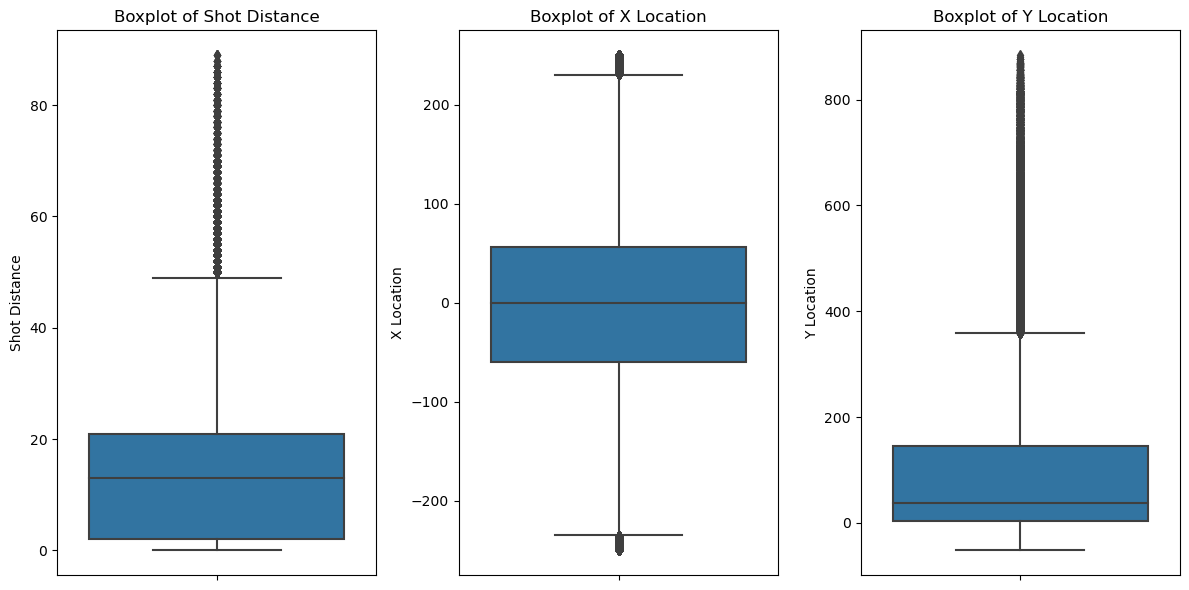

In [22]:
# Create box plots for numerical features
plt.figure(figsize = (12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(y = df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

It seems that the outliers identified statistically may not necessarily reflect true anomalies in the data, as certain locations and distances are indeed realistic in the context of basketball shots. While shots taken from distances greater than 50 feet may be statistically considered outliers due to their low frequency, they actually indicate a scarcity of attempts from such distances. Similarly, Y location values exceeding 350 feet may appear as statistical outliers, but they represent realistic shooting positions. As for the X location, although there are fewer data points observed on both sides (left and right) beyond +/-220 feet, these values are genuine and should be taken into account when building models.

Let's explore shot distance further through another visualization.

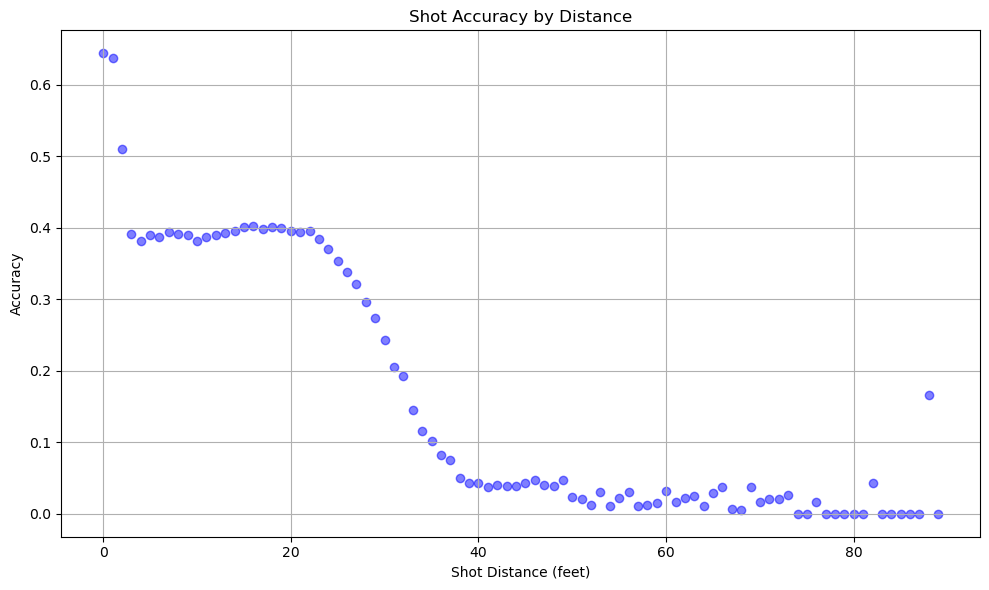

In [23]:
shot_count_by_distance = df.groupby('Shot Distance')['Shot Made Flag'].agg(['sum', 'count'])

# Calculate accuracy for each shot distance
shot_accuracy_by_distance = shot_count_by_distance['sum'] / shot_count_by_distance['count']

plt.figure(figsize = (10, 6))

# Plotting accuracy
plt.scatter(x = shot_accuracy_by_distance.index, 
            y = shot_accuracy_by_distance.values, 
            color = 'blue', alpha = 0.5)
plt.title('Shot Accuracy by Distance')
plt.xlabel('Shot Distance (feet)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.grid(True)
plt.show()

The graph above shows something interesting about how accurate NBA players are with their shots. Usually, we expect accuracy to drop as the shot gets farther from the basket. But between 5 to 25 feet away, accuracy stays about the same. There could be a few reasons. Players practice free throws a lot, which are taken from 15 feet away, so they're pretty good at shots from nearby distances. Also, defenders guard differently depending on how close the shooter is to the basket, which might make closer shots harder. But between 5 to 25 feet, these factors seem to balance out. So, even though we might think farther shots are always harder, this graph shows that's not always the case. It gives us a new perspective on how distance affects shooting accuracy.

In terms of outliers, the extreme value observed at the far right end of the graph, with an accuracy of approximately 0.18 points, could be considered an outlier. This is likely a scenario where a player hastily attempts a long-range shot as time expires, resulting in a low success rate. While these shots occasionally find success, they occur infrequently.

## Normalization and Standardization

During the data exploration phase, we are primarily focused on understanding the data distribution, identifying outliers, and gaining insights into feature relationships. We will not perform normalization and standardization during this phase as they can alter the data distribution and make it harder to interpret visualizations. Therefore, we will skip normalization and standardization during data exploration and apply them later during preprocessing, just before training the model.

# Visualizations and Statistics

Let's generate some visualizations to gain further insights.

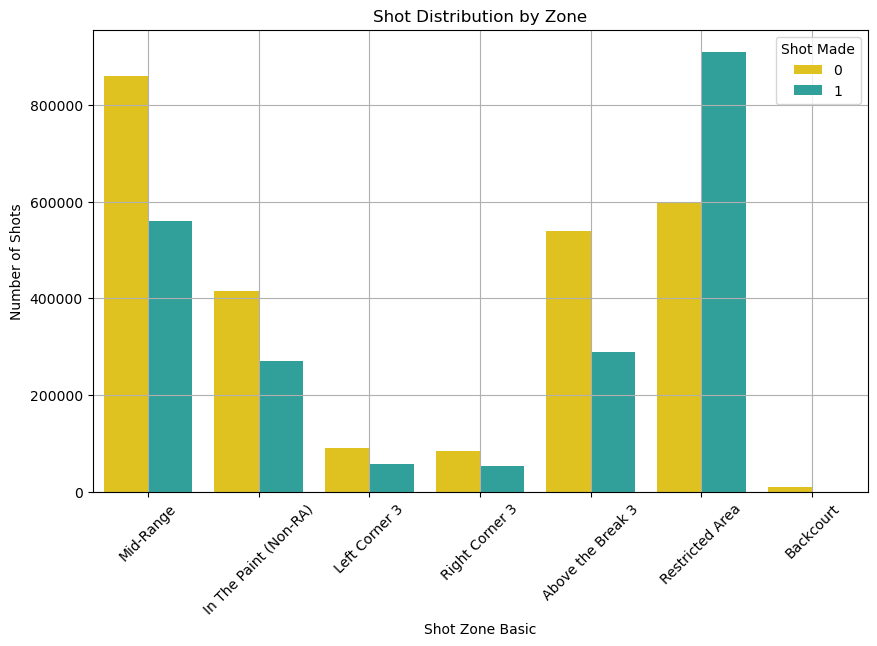

In [24]:
# Shot Distribution by Zone
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Shot Zone Basic', data = df, hue = 'Shot Made Flag', palette = ['gold', 'lightseagreen'])
plt.title('Shot Distribution by Zone')
plt.xlabel('Shot Zone Basic')
plt.ylabel('Number of Shots')
plt.xticks(rotation = 45)
plt.legend(title = 'Shot Made', loc = 'upper right')
plt.grid(True)
plt.show()

This count plot displays the distribution of both made and missed shots for each shot zone basic. The bars grouped by shot outcome (made or missed), with different colors representing each outcome. This visualization provides a clear comparison between the number of made and missed shots in each shot zone basic.

The shot accuracy in the Restricted Area stands out as notably higher when compared to other areas.

This graph shows something interesting about how accurate NBA players are with their shots. Usually, we expect accuracy to drop as the shot gets farther from the basket. But between 5 to 25 feet away, accuracy stays about the same. There could be a few reasons. Players practice free throws a lot, which are taken from 15 feet away, so they're pretty good at shots from nearby distances. Also, defenders guard differently depending on how close the shooter is to the basket, which might make closer shots harder. But between 5 to 25 feet, these factors seem to balance out.
So, even though we might think farther shots are always harder, this graph shows that's not always the case. It gives us a new perspective on how distance affects shooting accuracy.

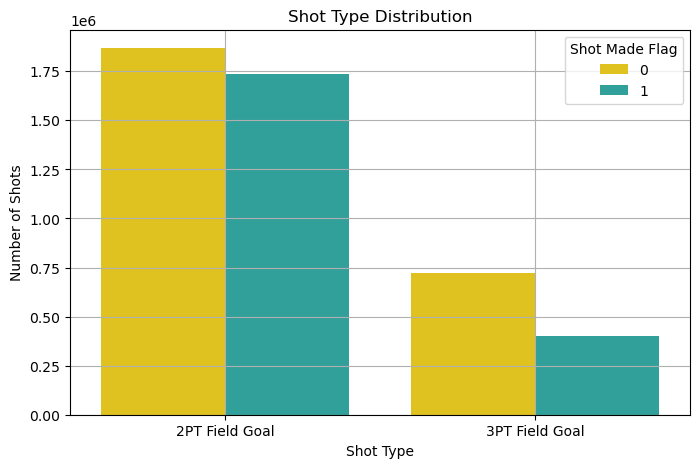

In [25]:
# Shot Type Distribution
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'Shot Type', hue = 'Shot Made Flag', palette = ['gold', 'lightseagreen'])
plt.title('Shot Type Distribution')
plt.xlabel('Shot Type')
plt.ylabel('Number of Shots')
plt.grid(True)
plt.show();

The plot reveals a substantial discrepancy in the distribution of shot types. The majority of shots taken are '2PT Field Goals', outnumbering '3PT Field Goals' by approximately threefold. Consequently, the differing proportions between these shot types indicate a notable disparity in the frequency of attempts between two-point and three-point shots.

This observation underscores the importance of analyzing shooting efficiency and strategy across different shot types. Further exploration into the factors influencing shot selection and success rates for both two-point and three-point shots can offer valuable insights into player performance and strategic decision-making during NBA games.

From the heatmap, we can discern patterns in shot selection and shooting accuracy across different court regions. Areas with a higher density of gold points indicate regions where players have successfully made shots, while areas with a higher density of blue points suggest regions where shots were missed more frequently.

Analyzing the shot heatmap provides valuable insights into player positioning, shooting tendencies, and areas of strength or weakness on the court. Further investigation into spatial patterns can inform strategic decisions related to player positioning, defensive strategies, and offensive playcalling in basketball games.

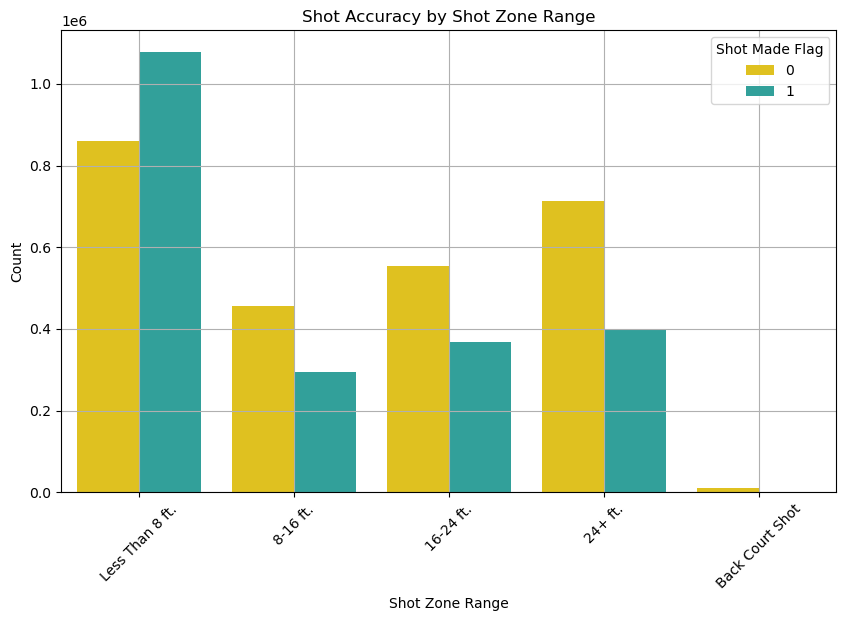

In [26]:
# Define the order of Shot Zone Range values
shot_zone_order = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.', 'Back Court Shot']

# Plotting countplot with specified order
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Shot Zone Range', hue = 'Shot Made Flag', palette = ['gold', 'lightseagreen'], order = shot_zone_order)
plt.title('Shot Accuracy by Shot Zone Range')
plt.xlabel('Shot Zone Range')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title = 'Shot Made Flag', loc = 'upper right')
plt.grid(True)
plt.show()

The plot highlights a distinct pattern in shot accuracy based on shot zone range. Shots taken in the nearest area (less than 8 ft. from the basket) exhibit notably higher accuracy compared to shots attempted from further distances. This observation suggests that players tend to have a higher likelihood of making shots when positioned closer to the basket.

The decline in shot accuracy with increasing distance from the basket aligns with the inherent difficulty of making shots from greater distances, attributed to factors such as shot angle, defensive pressure, and player skill. Understanding these patterns in shot accuracy across different shot zones is crucial for player positioning, offensive strategies, and shot selection during basketball games.

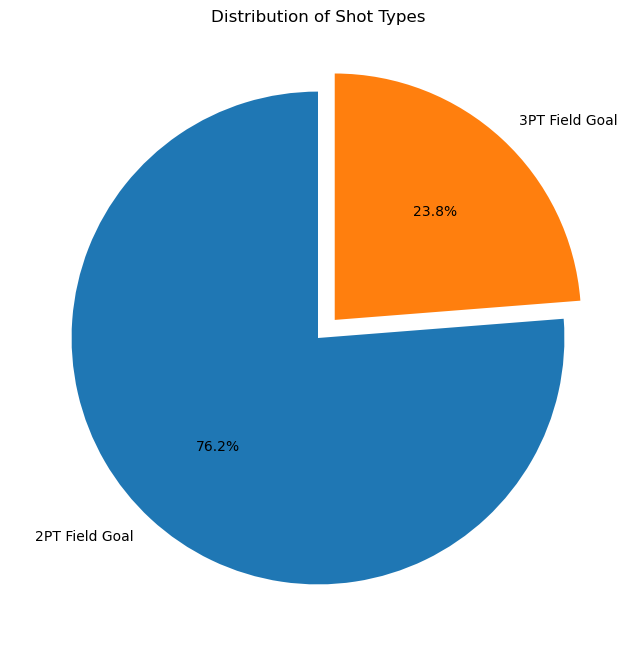

In [27]:
# Calculate the count of each shot type
shot_type_counts = df['Shot Type'].value_counts()

# Determine which slice to separate
explode = [0.1 if label == '3PT Field Goal' else 0 for label in shot_type_counts.index]

# Create a pie chart
plt.figure(figsize = (8, 8))
plt.pie(shot_type_counts, labels = shot_type_counts.index, autopct = '%1.1f%%', startangle = 90, explode = explode)
plt.title('Distribution of Shot Types')
plt.show()

From the visualization, it's evident that over three-quarters of the shots taken are 2-point shots, while the remaining proportion represents 3-point shots. This distribution underscores the prevalence of 2-point field goal attempts in NBA gameplay, reflecting the traditional emphasis on scoring close to the basket.

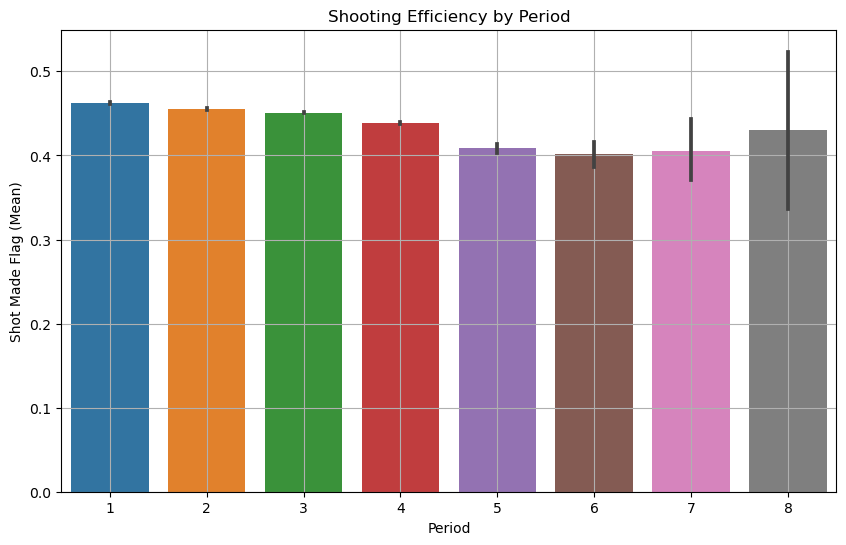

In [28]:
# Shooting Efficiency by Period
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Period', y = 'Shot Made Flag', data = df)
plt.title('Shooting Efficiency by Period')
plt.xlabel('Period')
plt.ylabel('Shot Made Flag (Mean)')
plt.grid(True)
plt.show()

Periods (1-4): Shooting efficiency remains stable, with consistent mean values and low variability. This suggests reliable shooting performance in the initial stages of the game.

Overtime-Periods (5-6): There is a slight decrease in shooting efficiency, accompanied by a small increase in variability. Shooting performance becomes moderately less consistent during these periods.

Overtime-Periods (7-8): Shooting efficiency experiences a sharper decline, with shorter columns indicating lower mean values and longer error bars indicating higher variability. Shooting performance becomes less consistent and more variable as the game progresses.

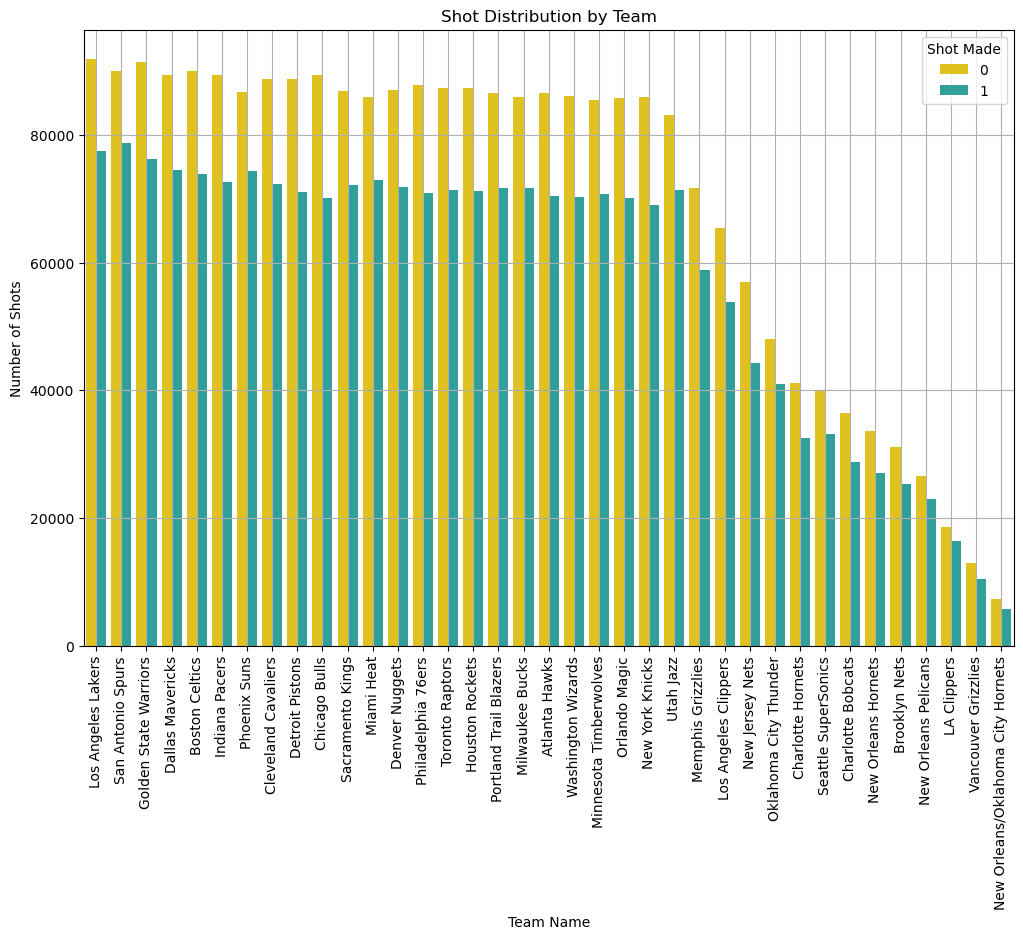

In [29]:
# Shot Distribution by Team
# Calculate the count of shots for each team
shot_counts_by_team = df['Team Name'].value_counts()

# Extract the names of the teams sorted by shot counts
sorted_teams = shot_counts_by_team.index

# Create the countplot with the sorted order
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = 'Team Name', hue = 'Shot Made Flag', order = sorted_teams, palette = ['gold', 'lightseagreen'])
plt.title('Shot Distribution by Team')
plt.xlabel('Team Name')
plt.ylabel('Number of Shots')
plt.xticks(rotation = 90)
plt.legend(title = 'Shot Made', loc = 'upper right')
plt.grid(True)
plt.show()

The shot distribution by team visualization offers insights into the distribution of shots made and missed by NBA teams, showcasing their offensive strategies and efficiency.

Upon analysis, we observe notable variations in shot distributions across different teams. Teams like LAL, SAS, GSW, and DM demonstrate impressive shot distributions, suggesting a well-balanced offensive strategy and efficient shot selection. In contrast, teams such as NOCH, VG, and LAC exhibit comparatively poor shot distributions, hinting at potential inefficiencies or tactical shortcomings in their offensive approach.

The shot distribution by team visualization provides valuable insights into the offensive dynamics and strategic tendencies of NBA teams. Further exploration may involve examining the factors contributing to variations in shot distribution, such as player roles, coaching philosophies, and offensive systems employed by each team.

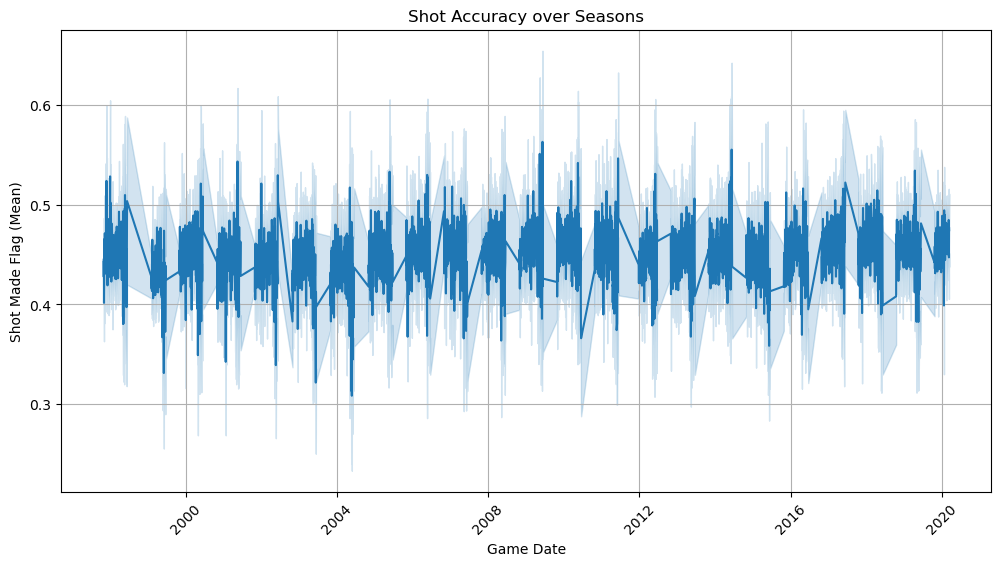

In [30]:
# Shot Accuracy over Seasons
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'Game Date', y = 'Shot Made Flag')
plt.title('Shot Accuracy over Seasons')
plt.xlabel('Game Date')
plt.ylabel('Shot Made Flag (Mean)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

The shot accuracy over seasons visualization tracks the trend of shot accuracy throughout the seasons of NBA gameplay. The line plot depicts the mean shot accuracy (proportion of shots made) over time, with the x-axis representing the game dates and the y-axis representing the mean shot made flag.

By monitoring shot accuracy trends over seasons, NBA teams can adapt their training regimens, gameplay strategies, and roster management approaches to enhance performance and achieve sustained success on the court.

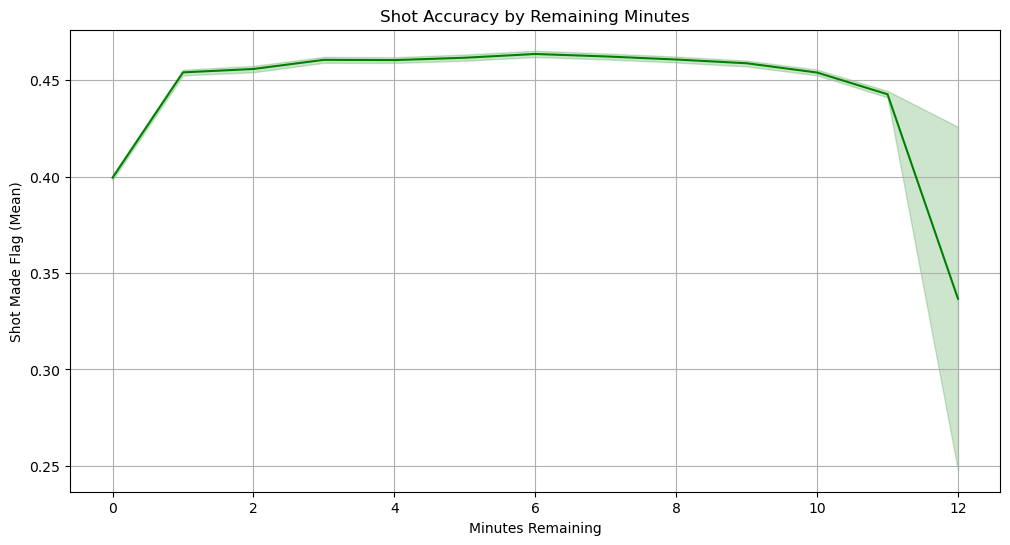

In [31]:
# Create a line plot for remaining minutes
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'Minutes Remaining', y = 'Shot Made Flag', color = 'green')
plt.title('Shot Accuracy by Remaining Minutes')
plt.xlabel('Minutes Remaining')
plt.ylabel('Shot Made Flag (Mean)')
plt.grid(True)
plt.show()


The graph reveals interesting insights into how shot accuracy evolves over the course of the game. The slight fluctuations in shot accuracy during the early minutes may reflect the teams' strategies, adjustments, or warm-up period. As the game progresses, we observe a gradual decline in shot accuracy, possibly due to increased fatigue, defensive pressure, or higher stakes in critical game moments. The narrowing confidence interval towards the end of the game indicates heightened certainty in shot accuracy estimation during crunch time, where players' decisions and execution become more decisive in determining game outcomes. This visualization underscores the importance of time management and strategic decision-making in basketball games, as they can significantly impact shot outcomes and ultimately, game results.

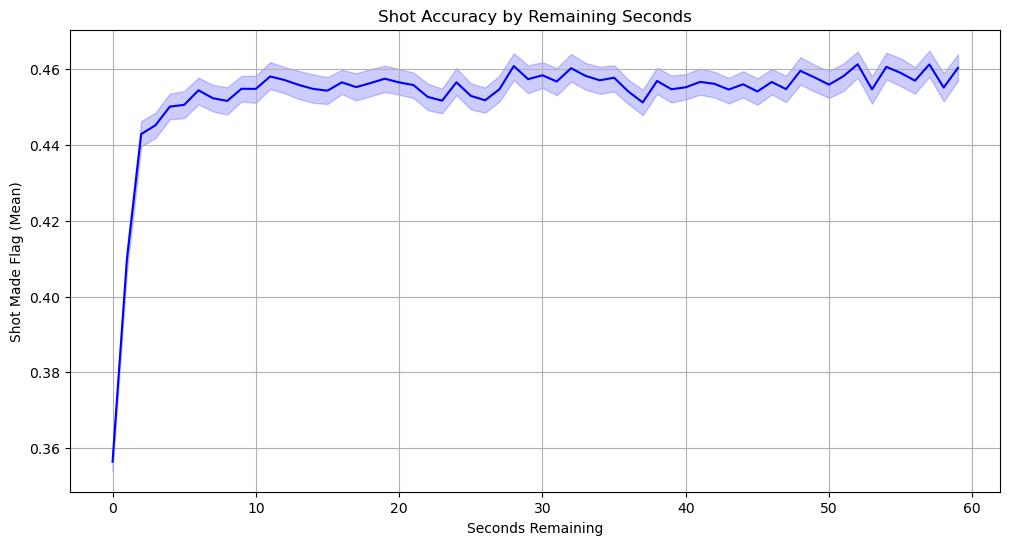

In [32]:
# Create a line plot for remaining seconds
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'Seconds Remaining', y = 'Shot Made Flag', color = 'blue')
plt.title('Shot Accuracy by Remaining Seconds')
plt.xlabel('Seconds Remaining')
plt.ylabel('Shot Made Flag (Mean)')
plt.grid(True)
plt.show()

The graph provides insights into how shot accuracy varies as the game clock winds down. The fluctuations in shot accuracy over different time intervals may reflect various game dynamics, including offensive strategies, defensive pressure, and players' performance under time constraints. The relatively stable shot accuracy observed towards the end of the game (around the last minute) indicates players' ability to maintain composure and execute shots effectively in high-pressure situations. This visualization underscores the significance of time management and decision-making in basketball, as players must navigate the game's final moments with precision to secure favorable outcomes.


# Stages of the project

## Classification of the problem

1. Type of Machine Learning Problem:
The machine learning problem in this project is a classification task. Specifically, it involves predicting whether a given NBA shot will be made or missed based on various features related to the shot.

2. Task Related to the Project:
The project is related to NBA shot analysis, which falls under sports analytics. The specific task is to analyze and predict the outcome of shots taken during NBA games, focusing on whether a shot will result in a successful make or a miss.

3. Main Performance Metric:
The main performance metric used to compare different machine learning models in this project is accuracy. Accuracy is chosen as the main metric because it provides a straightforward measure of how often the model's predictions are correct out of all predictions made. In the context of NBA shot analysis, accuracy helps evaluate the overall effectiveness of the model in predicting whether a shot will be made or missed.

4. Additional Performance Metrics:
In addition to accuracy, other quantitative performance metrics are used to evaluate the models' performance comprehensively. These metrics include:

    Precision: It measures the ratio of true positive predictions to the total number of positive predictions. In the context of NBA shot analysis, precision helps assess the model's ability to correctly identify made shots among all shots predicted as made.

    Recall (Sensitivity): It calculates the ratio of true positive predictions to the total number of actual positives. In the NBA shot analysis, recall evaluates the model's capability to capture all made shots, indicating its sensitivity to identifying positive instances (made shots).

    F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, considering both false positives and false negatives. This metric is useful in scenarios where we want to balance precision and recall, such as in the NBA shot analysis task where correctly identifying both made and missed shots is crucial.

    Area Under the ROC Curve (AUC-ROC): This metric evaluates the model's ability to distinguish between classes (made and missed shots) across various threshold values. A higher AUC-ROC value indicates a better-performing model in terms of class separation and predictive power.

    These additional metrics help in gaining a more nuanced understanding of the model's performance beyond just accuracy, taking into account factors like false positives, false negatives, and the balance between precision and recall.

In summary, the NBA shot analysis project involves a classification task where the goal is to predict whether a given shot will be made or missed. The main performance metric used is accuracy, supplemented by other quantitative metrics like precision, recall, F1 score, and AUC-ROC to provide a comprehensive evaluation of the machine learning models employed in the analysis.

## Model choice and optimization

1. Algorithms Explored:
In the NBA shot analysis project, several machine learning algorithms were experimented with to find the most suitable model for predicting shot outcomes. The algorithms tried include:

2. Selection of Models:
Among the various algorithms tested, the models selected for further optimization and evaluation were Random Forests and Boosting. These models were chosen for the following reasons:
    
    Random Forests: Random Forests are robust and effective for classification tasks, especially when dealing with a large number of features (as is often the case in sports analytics datasets). They are less prone to overfitting compared to individual decision trees and can handle non-linear relationships well.

    Boosting: Boosting algorithms are known for their ability to build strong predictive models by combining weak learners sequentially. They perform well in capturing complex patterns and can often outperform other algorithms in terms of predictive accuracy.

3. Parameter Optimization Techniques:
Parameter optimization techniques such as Grid Search and Cross-Validation were employed to fine-tune the selected models. Grid Search was used to explore different combinations of hyperparameters for each model, such as the number of trees, maximum depth, learning rate, etc.

4. Testing Advanced Models:
Apart from traditional machine learning algorithms like Random Forests and Boosting, advanced ensemble methods such as Bagging and Boosting were also tested in the project.

    Bagging (Random Forest with Bagging): Bagging involves creating multiple bootstrap samples of the training data and training a separate model on each sample. In this project, a variation of Bagging was tested using Random Forests with bagging, which can further improve model robustness and reduce variance.

    Boosting: Boosting algorithms were considered as advanced models due to their ability to sequentially improve the model's performance by focusing on correcting errors made by previous models. Boosting techniques can often lead to superior predictive performance compared to standalone models like logistic regression or SVM.
    
    Convolutional Neural Networks (CNNs): CNN explored as part of the algorithm selection process for their unique ability to capture spatial patterns in data, particularly in image-based datasets. In the context of NBA shot analysis, CNNs were evaluated to determine their effectiveness in extracting features from shot images or related visual data.

These advanced models were tested to explore their potential for enhancing the predictive accuracy and generalization capability of the NBA shot analysis model.

In conclusion, the model selection process in the NBA shot analysis project involved experimenting with various algorithms such as Logistic Regression, SVM, Random Forests, Boosting, Bagging and CNN. Random Forests and Boosting were chosen based on their performance, suitability for the task, and potential for optimization. Parameter optimization techniques like Grid Search and Cross-Validation were utilized to fine-tune these models, and advanced techniques such as Bagging and Boosting were also explored to improve predictive accuracy and model robustness.

# Preprocessing NBA player shot dataset for modeling purposes

In the Report1 we undertook essential preprocessing steps and conducted exploratory data analysis through visualization techniques. Our focus now shifts towards building machine learning models to gain deeper insights and make predictions based on our dataset. However, before we delve into model development, it's crucial to ensure that our data is adequately prepared. This involves transforming qualitative attributes into quantitative representations, normalizing features, and other necessary preparations to optimize the performance of our models.

In this part, we will carry out these preliminary tasks, laying the groundwork for our subsequent modeling endeavors. By converting qualitative attributes to quantitative ones and applying normalization techniques, we aim to create a clean and standardized dataset that is well-suited for machine learning analysis. 

Our ultimate goal is to generate preprocessed and refined training and testing datasets. These datasets will lay the groundwork for our modeling endeavors, facilitating the smooth progression of building and assessing machine learning models in the subsequent phases of our project.

In [22]:
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('NBA Shot Locations 1997 - 2020.csv')

## Categorical variable transformation and feature normalization

In machine learning and statistical modeling, the quality and format of input data significantly impact the performance and accuracy of predictive models. When working with datasets that contain categorical variables (attributes that represent qualitative characteristics) transforming these variables into numerical representations becomes imperative. Categorical variable transformation enables machine learning algorithms to interpret and analyze these variables effectively, allowing for meaningful insights and accurate predictions.

Furthermore, to ensure fair and optimal treatment of different features during model training, it is essential to normalize numerical features. Feature normalization standardizes the scale of input features, preventing certain variables from dominating the model training process due to their larger magnitude. By scaling features to a common range or distribution, feature normalization promotes stability, convergence, and improved generalization of machine learning models.

In summary, the process of categorical variable transformation and feature normalization is fundamental in preparing datasets for machine learning tasks, ensuring that models can effectively learn from and generalize to new data.

### Transform attributes with high cardinality

Convert attributes, which have very large number of unique values.

Let's look at the unique valkues of 'Action Type' column.

In [50]:
print('There is', df['Action Type'].nunique(), 'Action Type values.')

There is 70 Action Type values.


In [51]:
df['Action Type'].value_counts()

Action Type
Jump Shot                      2570552
Layup Shot                      609190
Driving Layup Shot              293150
Pullup Jump shot                137984
Hook Shot                        91485
                                ...   
Driving Reverse Dunk Shot          217
Running Bank Hook Shot             187
Turnaround Finger Roll Shot        127
Running Reverse Dunk Shot          102
Putback Reverse Dunk Shot           10
Name: count, Length: 70, dtype: int64

Most machine learning algorithms operate with quantitative variables, hence the need to convert these values into numerical representations. With 70 unique action types, employing one-hot encoding would introduce an excessive number of additional columns, which is impractical. As we lack expertise in NBA terminology to group similar action types for discretization or feature engineering, our best option would be to utilize frequency encoding in this scenario. Instead of creating binary indicator variables for each unique action type, we could encode each action type based on its frequency in the dataset. This approach replaces each action type with the proportion of shots that belong to that category. This can be useful if certain action types occur more frequently than others and we want to capture that information in the model.

Step 1. Calculate the frequency of each unique action type.

In [52]:
action_type_frequency = df['Action Type'].value_counts(normalize = True)

Step 2. Replace each action type with its frequency in the dataset

In [53]:
df['Action Type Frequency'] = df['Action Type'].map(action_type_frequency)
df.drop(['Action Type'], axis = 1, inplace = True)

These values represent the proportions of each category in the dataset, where the sum of all proportions would be equal to 1. In the context of frequency encoding for machine learning, using normalize=True ensures that each category's encoding represents its relative frequency in the dataset, making it suitable for capturing the distribution of categorical variables in a normalized manner.

Let's do the same for 'Team Name' column.

In [55]:
print('There is', df['Team Name'].nunique(), 'Team Name values.')
df['Team Name'].unique()

There is 37 Team Name values.


array(['Washington Wizards', 'Utah Jazz', 'San Antonio Spurs',
       'Atlanta Hawks', 'Toronto Raptors', 'Portland Trail Blazers',
       'New York Knicks', 'Houston Rockets', 'Phoenix Suns', 'Miami Heat',
       'Cleveland Cavaliers', 'Milwaukee Bucks', 'Los Angeles Clippers',
       'Philadelphia 76ers', 'Denver Nuggets', 'Golden State Warriors',
       'Orlando Magic', 'Dallas Mavericks', 'Seattle SuperSonics',
       'Sacramento Kings', 'Los Angeles Lakers', 'Vancouver Grizzlies',
       'Charlotte Hornets', 'New Jersey Nets', 'Chicago Bulls',
       'Indiana Pacers', 'Boston Celtics', 'Detroit Pistons',
       'Minnesota Timberwolves', 'Memphis Grizzlies',
       'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans', 'LA Clippers'],
      dtype=object)

With the same reason as for 'Action Type', we can do feature encoding for 'Team Name', 'Home Team' and 'Away Team' columns. This time we will create function and will use that.

In [56]:
# Function to perform frequency encoding
def frequency_encode_column(df, column_name):
    # Step 1. Calculate the frequency of each unique value in the column
    frequency = df[column_name].value_counts(normalize=True)
    
    # Step 2. Replace each value with its frequency in the dataset
    df[column_name + '_Frequency'] = df[column_name].map(frequency)

    
    
# Apply frequency encoding to the 'Team Name' column
frequency_encode_column(df, 'Team Name')

# Apply frequency encoding to the 'Home Team' column
frequency_encode_column(df, 'Home Team')

# Apply frequency encoding to the 'Away Team' column
frequency_encode_column(df, 'Away Team')

# Drop the original categorical columns
df.drop(['Team Name', 'Home Team', 'Away Team'], axis = 1, inplace = True)


In our dataset 'Team ID' and 'Team Name' contains exactly the same information. Let's remove 'Team ID' column.

In [57]:
df.drop(['Team ID'], axis = 1, inplace = True)

### Transform other categorical attributes

Now, let's proceed to the next task. We have some categorical columns that need to be dichotomized. This involves transforming these categorical variables into "quantitative" variables that can be interpreted by a machine learning model.

In our dataset 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area', 'Shot Zone Range', 'Season Type' columns contain qualitative values. Let's transform them.

We will use One Hot Encoding technique to encode a qualitative variable.

Step 1. Perform one-hot encoding for each categorical column

In [58]:
shot_type_encoded = pd.get_dummies(df['Shot Type'], prefix = 'ShotType', dtype = int)
shot_zone_basic_encoded = pd.get_dummies(df['Shot Zone Basic'], prefix = 'ShotZoneBasic', dtype = int)
shot_zone_area_encoded = pd.get_dummies(df['Shot Zone Area'], prefix = 'ShotZoneArea', dtype = int)
season_zone_range_encoded = pd.get_dummies(df['Shot Zone Range'], prefix = 'ShotZoneRange', dtype = int)
season_type_encoded = pd.get_dummies(df['Season Type'], prefix = 'SeasonType', dtype = int)

Step 2. Concatenate the one-hot encoded columns with the original DataFrame

In [59]:
df = pd.concat([df, shot_type_encoded, shot_zone_basic_encoded, shot_zone_area_encoded, season_zone_range_encoded, season_type_encoded], axis=1)

Step 3. Drop the original categorical columns

In [60]:
df.drop(['Shot Type', 'Shot Zone Basic', 'Shot Zone Area', 'Shot Zone Range', 'Season Type'], axis = 1, inplace = True)

### Transform quantitative attributes, which have unique id values

In our dataset 'Player ID' and 'Player Name' contains exactly the same information. Let's remove 'Player Name' column.

In [61]:
df.drop(['Player Name'], axis = 1, inplace = True)

Let's investigate 'Game ID', 'Game Event ID', 'Player ID' columns. These contain unique identifiers and lack inherent numerical meaning, it's important to handle them appropriately for machine learning tasks.

Since these unique identifiers are repeated and associated with different instances or records in our dataset, then they can be considered as categorical variables rather than unique identifiers. In this case, we can apply feature encoding techniques to represent these categorical variables numerically.

Frequency encoding can indeed be applied to our unique identifiers.

In [62]:
# We will use our previously created function.

# Apply frequency encoding to 'Game ID' column
frequency_encode_column(df, 'Game ID')

# Apply frequency encoding to 'Game Event ID' column
frequency_encode_column(df, 'Game Event ID')

# Apply frequency encoding to 'Player ID' column
frequency_encode_column(df, 'Player ID')

# Drop the original columns
df.drop(['Game ID', 'Game Event ID', 'Player ID'], axis = 1, inplace = True)

## Transform date attribute

Let's transform date value to more readable format.

In [63]:
df['Game Date'] = pd.to_datetime(df['Game Date'], format='%Y%m%d')

In [64]:
min_date = df['Game Date'].min()
max_date = df['Game Date'].max()
display(min_date)
display(max_date)
print(f"Our data looks at the time period from {min_date.year} to {max_date.year}")

Timestamp('1997-10-31 00:00:00')

Timestamp('2020-03-11 00:00:00')

Our data looks at the time period from 1997 to 2020


The approach to handling date features in classification models is generally similar across different types of classifiers, including logistic regression. Date objects cannot be directly used as predictors in classification models, as these models require numerical input features.

Therefore, regardless of the specific classification model we are using, we typically need to perform feature engineering on the date column to extract relevant numerical features.

There are some common approaches to feature engineering with date data in classification models. We will use Extract Components. This approach extracts relevant components from the date, such as year, month, day, day of the week. These components can then be encoded as numerical features.

In [65]:
# Extract components
df['Year'] = df['Game Date'].dt.year
df['Month'] = df['Game Date'].dt.month
df['Day'] = df['Game Date'].dt.day
df['Day_of_Week'] = df['Game Date'].dt.dayofweek  # Monday = 0, Sunday = 6

Display the DataFrame with extracted components.

In [66]:
df[['Game Date', 'Year', 'Month', 'Day', 'Day_of_Week']].head()

,Game Date,Year,Month,Day,Day_of_Week
0,1998-01-02,1998,1,2,4
1,1998-01-02,1998,1,2,4
2,1998-01-02,1998,1,2,4
3,1998-01-02,1998,1,2,4
4,1998-01-02,1998,1,2,4


Remove 'Game Date' column.

In [67]:
df.drop('Game Date', axis = 1, inplace = True)

## Correlation matrix

Now that we have transformed all features into numeric values, we can proceed to create a correlation matrix specifically for the 'Shot Made Flag' target variable.

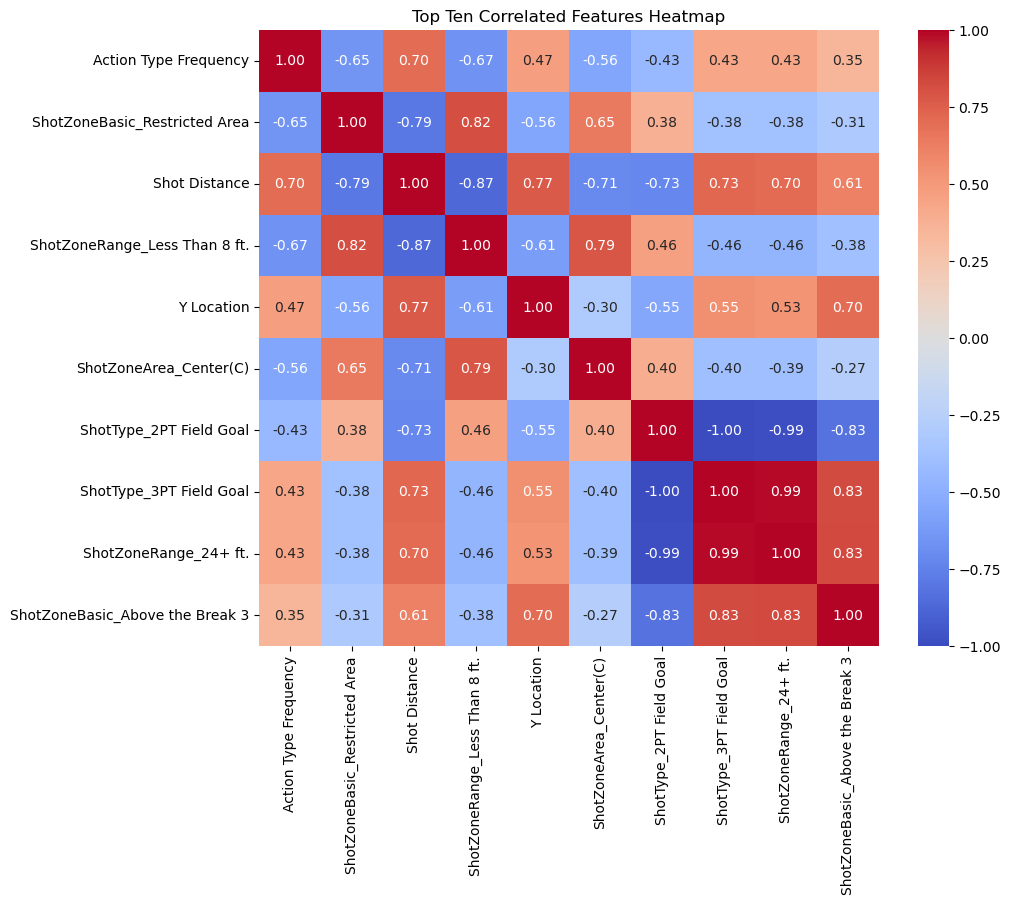

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Get the top ten most correlated features with the target variable
target_corr = corr_matrix['Shot Made Flag'].abs().sort_values(ascending=False)
top_corr_features = target_corr[1:11].index  # Exclude the target itself

# Select only the top ten most correlated features from the correlation matrix
corr_matrix_top = corr_matrix.loc[top_corr_features, top_corr_features]

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix_top, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Ten Correlated Features Heatmap')
plt.show()

One can see by viewing these map that for an NBA player to increase his chances of making a shot, he should be as close as possible to the basket (ShotZoneRange_Less Than 8 ft., ShotZoneBasic_Restricted Area). 

The high correlation coefficient of 0.99 between 'ShotType_3PT Field Goal' and 'ShotZoneRange_24+ ft.' signifies a strong relationship between attempting three-point shots and shooting from beyond the 24-foot mark on the court. This suggests that NBA players who frequently attempt three-pointers are more likely to do so from long distances, beyond the traditional three-point line. Coaches and analysts may use this insight to strategize offensive plays that leverage players' shooting abilities from long range, optimizing scoring opportunities based on shot selection and player positions on the court.

Let's create a plot showcasing the first 15 features that are correlated most with the target variable 'Shot Made Flag'.

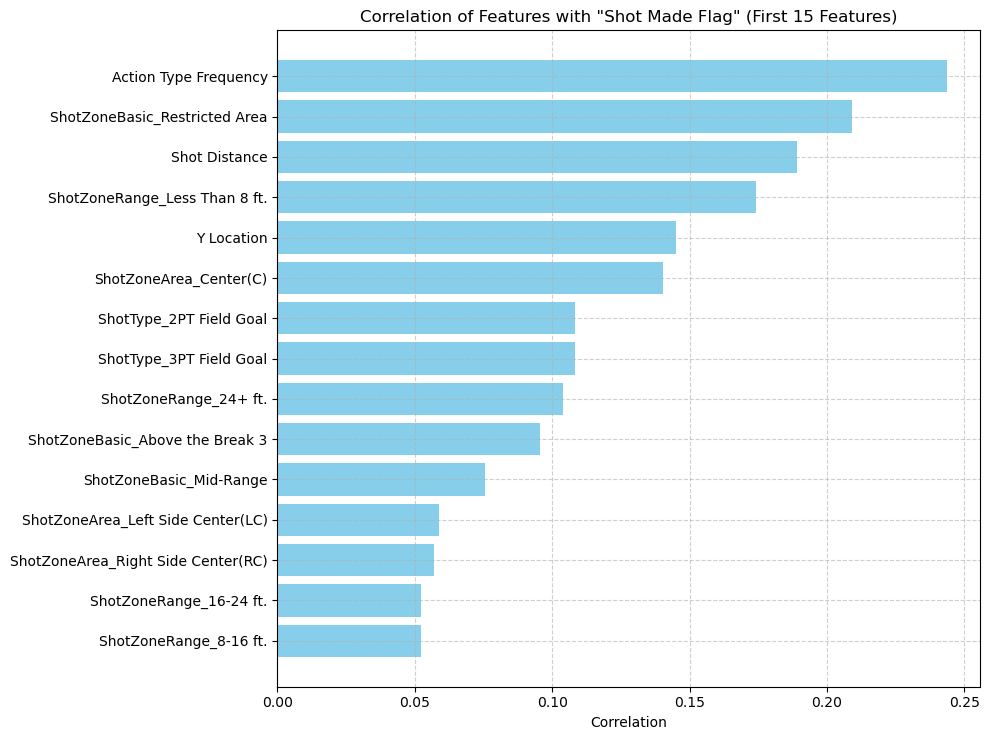

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Get the correlation of features with the target variable
target_corr = corr_matrix['Shot Made Flag'].abs().sort_values(ascending=False)
features = target_corr.index[1:16].tolist()  # Exclude 'Shot Made Flag' and get the first 15 features
correlations = target_corr.values[1:16].tolist()  # Exclude its correlation value and get the first 15 correlations

# Plot the bar plot with adjusted spacing and grid lines for the first 15 features
plt.figure(figsize=(10, len(features) * 0.5))  # Adjust figure height based on number of features
bars = plt.barh(features, correlations, color='skyblue')
plt.xlabel('Correlation')
plt.title('Correlation of Features with "Shot Made Flag" (First 15 Features)')
plt.gca().invert_yaxis()  # Invert y-axis to display highest correlation at the top
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines with dashed style and transparency
plt.tight_layout()  # Adjust spacing to prevent text overlap
plt.show()


The correlation plot highlights the features most strongly correlated with 'Shot Made Flag'.

'Action Type Frequency' shows a high positive correlation, suggesting that the frequency of specific actions during a shot attempt significantly impacts shot success.

'ShotZoneBasic_Restricted Area' and 'Shot Distance' also exhibit strong positive correlations, indicating that shots taken from restricted areas and shorter distances are more likely to be made.

Furthermore, 'ShotType_2PT Field Goal' and 'ShotType_3PT Field Goal' reflect the influence of shot type on success rates, with both two-point field goals (2PT) and three-point field goals (3PT) having an equal impact on shot success rates.

## Split train and test parts

Let's create a data DataFrame in which we will store the features and create the target data variable.

In [80]:
data = df.drop('Shot Made Flag', axis = 1)
target = df['Shot Made Flag']

In order to test the performance of the classification model, it is necessary to select a part of the data that is dedicated to the evaluation and that is therefore not taken into account in the training of the model.
To do this, the data must be systematically divided into a training set (X_train and y_train) and a test set (X_test and y_test).

Usually, the test set size is between 15% and 30% of the total amount of data. The choice of the distribution depends mainly on the quantity and quality of the available data. We will choose 20%.

Let's randomly divide the matrices into a training set and a test set corresponding to 80% and 20% of the total amount of available data respectively. Add the argument random_state = 66 for randomness reproducibility.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 66)

To build a classification model, we need to train our model on the training set only.

We intend to store these training and testing sets in a file for later use in modeling tasks. Ensuring consistency, all models will be trained on these identical sets. This approach will provide us with a clearer understanding of each model's performance under the same conditions, aiding in the determination of the most effective model.

## Conclusion for preprocessing

We converted all categorical attributes to quantitative. Our dataset ready for further modeling.

In [82]:
df.dtypes

Period                                   int64
Minutes Remaining                        int64
Seconds Remaining                        int64
Shot Distance                            int64
X Location                               int64
Y Location                               int64
Shot Made Flag                           int64
Action Type Frequency                  float64
Team Name_Frequency                    float64
Home Team_Frequency                    float64
Away Team_Frequency                    float64
ShotType_2PT Field Goal                  int64
ShotType_3PT Field Goal                  int64
ShotZoneBasic_Above the Break 3          int64
ShotZoneBasic_Backcourt                  int64
ShotZoneBasic_In The Paint (Non-RA)      int64
ShotZoneBasic_Left Corner 3              int64
ShotZoneBasic_Mid-Range                  int64
ShotZoneBasic_Restricted Area            int64
ShotZoneBasic_Right Corner 3             int64
ShotZoneArea_Back Court(BC)              int64
ShotZoneArea_

For now, our focus has been on converting categorical attributes into quantitative representations. We'll defer the scaling process to the appropriate modeling stage, where each model can adopt its own scaling approach (Standardization, MinMax Scaling or other type of scaling) based on its requirements and the characteristics of the data. The current emphasis has been on ensuring that our data is prepared in a format conducive to modeling, with further considerations such as feature scaling left for subsequent stages tailored to each specific model.

## Save train-test sets in a file

Save the train and test sets in a new 'joblib' file.

In [83]:
# WARNING: This call can take a few minutes.
from joblib import dump, load

# Save the data
dump((X_train, X_test, y_train, y_test), 'NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

print("New joblib file generated successfully.")

# Later model parts can read the data from it with help of: 
# X_train, X_test, y_train, y_test = load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

New joblib file generated successfully.


# NBA player shot analysis with Logistic Regression

In this section, we will dive into the logistic regression model. The packages utilized will include pandas and scikit-learn, along with its sub-packages linear_model, preprocessing, and joblib.

This task centers on exploring the parameters that may impact the shot outcomes of NBA players. The dataset under analysis comprises quantitative variables.

## Pre-processing and feature engineering

Read the train and test sets from the file 'NBA Shot Locations 1997 - 2020-Report2-train-test.joblib'.

In [2]:
from joblib import load

X_train, X_test, y_train, y_test = load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

## Standardization

Let's see min and max values of some columns.

In [4]:
# Compute minimum and maximum values for some columns
column_names = ['X Location', 
                'Y Location', 
                'Action Type Frequency', 
                'ShotType_2PT Field Goal', 
                'ShotZoneRange_Less Than 8 ft.',
                'Player ID_Frequency']

min_values = X_train[column_names].min()
max_values = X_train[column_names].max()

# Print minimum values
print("Minimum values:")
print(min_values.apply(lambda x: round(x, 6)))

# Print maximum values
print("\nMaximum values:")
print(max_values.apply(lambda x: round(x, 6)))

Minimum values:
X Location                      -250.000000
Y Location                       -52.000000
Action Type Frequency              0.000002
ShotType_2PT Field Goal            0.000000
ShotZoneRange_Less Than 8 ft.      0.000000
Player ID_Frequency                0.000000
dtype: float64

Maximum values:
X Location                       250.000000
Y Location                       881.000000
Action Type Frequency              0.543513
ShotType_2PT Field Goal            1.000000
ShotZoneRange_Less Than 8 ft.      1.000000
Player ID_Frequency                0.006390
dtype: float64


To ensure optimal performance of our model, it would be advisable to perform scaling before applying logistic regression classification. Since we have columns with values between [-250, 250] and [0, 1], it's crucial to scale them appropriately to ensure that all features contribute equally to the model training process.

In our case, since we have both negative and positive values in some columns, and logistic regression is not sensitive to the scale of features, we can consider using Standard Scaling. Standard Scaling will transform our features to have a mean of 0 and a standard deviation of 1, without bounding them to a specific range like [-1, 1] or [0, 1].

Note: we will only scale the numerical features and not the encoded categorical features or the target column 'Shot Made Flag'. Also, the scaling is not necessary for columns generated from frequency encoding as their values are already in the range [0, 1].

In [86]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

columns_to_scale = ['Period',
                    'Minutes Remaining',
                    'Seconds Remaining', 
                    'Shot Distance', 
                    'X Location', 
                    'Y Location']

# Scale the features for train set and replace the original columns with the scaled features
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Scale the features for test set and replace the original columns with the scaled features
X_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])

Note: This technique scales the features to have a mean of 0 and a standard deviation of 1. Since the date components are already in different units (e.g., year, month, day), they may not benefit from standard scaling. In fact, applying standard scaling to these components could distort their meaning.

## Classification by logistic regression

Let's create a clf Classifier, using the LogisticRegression method of the linear_model package.
Then train the algorithm on the training set (X_train and y_train).

In [87]:
# WARNING: This call can take a few minutes

# we use optimization algorithm 'liblinear'
clf_lr = linear_model.LogisticRegression(solver = 'liblinear', C = 0.001, max_iter = 1000)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=1000, solver='liblinear')

## Evaluation of the classification model 

### Confusion matrix

Now it is possible to calculate the prediction for the data in the test set, and construct the confusion matrix.

Predict the data in the test set and store it in the variable y_pred.

In [88]:
y_pred_lr = clf_lr.predict(X_test)

Create and display the confusion matrix cm.

In [91]:
def show_confusion_matrix(y_test, y_pred, figsize=(4, 3)):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Convert confusion matrix to DataFrame for easier manipulation
    cm_df = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])

    # Plotting the heatmap with annotations
    plt.figure(figsize=figsize)  # Adjust the figsize here
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d', linewidths=.5, cbar=False)

    # Adding title and labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

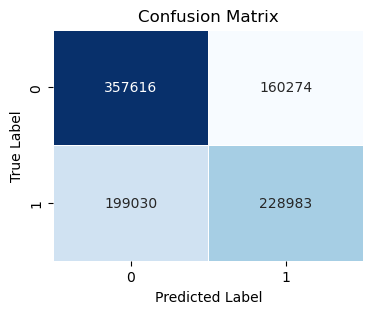

In [92]:
show_confusion_matrix(y_test, y_pred_lr)

The confusion matrix, above, illustrates that the number of good classifications (on the diagonal) is greater than the number of bad classifications.

Is it the model that is unsuitable for this type of data or is it the parameterization that is unsuitable?

Many machine learning algorithms, such as Logistic regression, rely on hyperparameters that are not always obvious to determine in order to obtain the best performance on a given dataset.

Unlike the simple parameters of the model which are directly derived from the data (e.g. the coefficients of a regression), the hyperparameters make it possible to decide on the structure of the model and must be set before training it.

In most cases, when several hyperparameters are to be set, and one does not know which ones to use to obtain the best possible model, the most efficient strategy is to create a search grid. We indicate the parameters to be varied. Then the parameters are crossed and a model is created and evaluated for each possible combination by cross validation.

Create a dictionary parameters containing the possible values taken for the parameter:

In [94]:
param_grid_lr = {
    'C': [0.01, 1, 100],  # Focus on a few values of C that cover a wide range of regularization strengths
    'penalty': ['l2'],  # Only include L2 penalty as it generally works well for large datasets
    'solver': ['liblinear']  # Only include liblinear solver as it generally works well for large datasets
}
param_grid_lr

{'C': [0.01, 1, 100], 'penalty': ['l2'], 'solver': ['liblinear']}

Apply the function model_selection.GridSearchCV() to the clf model, specifying in the param_grid argument the parameter grid created above. Return the classifier thus created in grid_clf. The scoring argument allows us to choose the metric we want to use to evaluate the performance of the models, by default it is accuracy.

In [95]:
from sklearn.model_selection import GridSearchCV

grid_clf_lr = GridSearchCV(estimator = clf_lr, param_grid = param_grid_lr)

Train grid_clf on the training set, (X_train, y_train). Save the results in the grid object.

In [96]:
# WARNING: This call can take up to 10 minutes

grid_lr = grid_clf_lr.fit(X_train, y_train)

Following results displays all possible combinations of hyperparameters and the average performance of the associated model by cross validation.

In [97]:
print(pd.DataFrame.from_dict(grid_lr.cv_results_).loc[:,['params', 'mean_test_score']]) 

                                              params  mean_test_score
0  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...         0.620353
1   {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}         0.620370
2  {'C': 100, 'penalty': 'l2', 'solver': 'libline...         0.620349


The best_params_ attribute of the created model allows to display the parameters having given the best score and retained by default.

In [99]:
print(grid_clf_lr.best_params_)

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Now make class predictions using the grid_clf model on the test set and store them in the y_pred variable, and print a confusion matrix from these predictions.

In [100]:
# Prediction of the test features and creation of the confusion matrix
y_pred_lr = grid_clf_lr.predict(X_test)

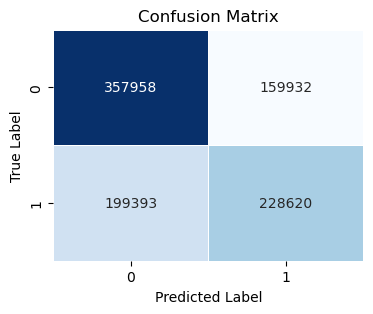

In [101]:
show_confusion_matrix(y_test, y_pred_lr)

The confusion matrix is non-significantly better than that obtained at the beginning of this paragraph. The tuning of hyperparameters is thus a very useful and essential step when creating models, especially when one has several important hyperparameters, such as Logistic regression, and is thus not to be neglected.

### Accuracy score

The accuracy of a model is a metric often used in classification and corresponds to the number of well classified elements out of the total number of shots. It can be computed by using the score attribute of the classifier (clf).

Let's create a new classifier with the best parameters, fit it on the training data and calculate accuracy on test and train sets.

In [102]:
# Get the best parameters
best_params_lr = grid_clf_lr.best_params_

# Create a new classifier with the best parameters
best_clf_lr = linear_model.LogisticRegression(**best_params_lr)

# Fit the best classifier on the training data
best_clf_lr.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [103]:
accuracy_test_lr = best_clf_lr.score(X_test, y_test)
print(accuracy_test_lr)
print("This logistic regression model achieved an accuracy of approximately {:.2f}% on the test set.".format(accuracy_test_lr * 100))

0.6201248965274452
This logistic regression model achieved an accuracy of approximately 62.01% on the test set.


If we do accuracy test also on train set then we will have more or less same result.

In [104]:
accuracy_train_lr = best_clf_lr.score(X_train, y_train)
print(accuracy_train_lr)
print("This logistic regression model achieved an accuracy of approximately {:.2f}% on the train set.".format(accuracy_train_lr * 100))

0.6203674851180447
This logistic regression model achieved an accuracy of approximately 62.04% on the train set.


Save the best model to a file.

In [106]:
# Save the best model to a file
dump(best_clf_lr, 'model_best_lr.joblib')

['model_best_lr.joblib']

### Classification report

The function classification_report() of the sklearn.metrics sub-module allows to display some of these additional metrics, with as arguments the vector of true labels, and the vector of predicted labels.

Display the classification report of our predictions.

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67    517890
           1       0.59      0.53      0.56    428013

    accuracy                           0.62    945903
   macro avg       0.62      0.61      0.61    945903
weighted avg       0.62      0.62      0.62    945903



The precision and recall scores provide insights into the model's ability to correctly classify instances of each class. In this case, the precision for class 0 (0.64) is higher than that for class 1 (0.59), indicating that the model is better at correctly identifying instances of class 0. However, the recall for class 0 (0.69) is higher than that for class 1 (0.53), indicating that the model is better at capturing a higher proportion of true instances for class 0 compared to class 1.

### ROC curve

By default, the predict() method of a classifier in the case of a logistic regression classifies shot result as positive when the probability of belonging to the positive class is greater than the threshold of 0.5, and negative otherwise. Sometimes, we may want to modify this classification threshold. 

Let's say we want to change threshold to 0.4.

In that case the lower the classification threshold, the more the number of shot-mades classified as 1 increases, so the sensitivity will increase. On the other hand, a shot-made is classified as 0 only if the probability that it belongs to this class is higher than 0.6, which increases the precision of the null class but decreases the specificity.

Another very efficient tool to evaluate the performance of a model is the ROC curve. The ROC curve (for Receiver Operating Characteristic) is the ideal tool to summarize the performance of a binary classifier according to all possible thresholds. It avoids the time-consuming task of predicting classes for different thresholds, and evaluating the confusion matrix for each of these thresholds.

Graphically, the ROC measure is represented as a curve which gives the true positive rate, the sensitivity, as a function of the false positive rate, the antispecificity ( = 1 - specificity). Each classification threshold value will provide a point on the ROC curve, which will go from (0, 0) to (1, 1).

The closer the curve is to the (0,1) point (top left), the better the predictions. A model with sensitivity and specificity equal to 1 is considered perfect.

The area under the curve (AUC: Area Under the Curve) is very useful. In a single number it summarizes the ability of the model to distinguish the negative class from the positive class (Non Admitted / Admitted).

An AUC score of 0.5 means that the model is not better than a random classification, an AUC score of 1.0 means a perfectly predictive model, and an AUC of 0.0 is perfectly anti-predictive (very rare).

The sklearn.metrics module contains the function roc_curve() which returns an array of false positive rates (anti-specificity), an array of true positive rates (sensitivity), and an array of classification thresholds taking values between 0 and 1. It takes as argument the vector of labels we want to predict, a vector of probabilities to belong to the positive class and the argument pos_label, which allows to choose which label is defined as positive.

The function auc() of the same module computes the area under the curve when given as arguments a vector of false positive rates and a vector of the same size of true positive rates.

Step 1. Apply the roc_curve() function to y_test and the second column of probs, specifying that the positive label in our case is 1. Store the returned results in the fpr, tpr, thresholds tables.

Step 2. Calculate in roc_auc the AUC corresponding to the values of fpr and tpr.

In [108]:
from sklearn.metrics import roc_curve, auc

# predict_proba returns, for given shots, not the class predictions,
# but the probabilities of belonging to each of the two classes
probs_lr = best_clf_lr.predict_proba(X_test)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr[:,1], pos_label = 1)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lr

0.6531505047507934

From the variables fpr, tpr and roc_auc, create a reproduction of the graph.

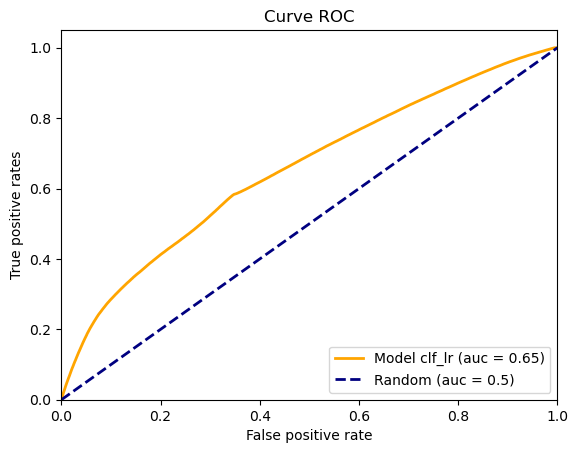

In [109]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label='Model clf_lr (auc = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Random (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rates')
plt.title('Curve ROC')
plt.legend(loc="lower right")
plt.show();

While a ROC AUC of 0.65 suggests that the model has some predictive ability, further analysis and consideration of specific requirements are needed to determine its suitability for practical applications. Additionally, exploring alternative models or optimization strategies may help improve performance further.

## Conclusion for Logistic Regression

The accuracy of the logistic regression model on the test dataset was observed to be approximately 62%. This indicates that the model correctly classified 62% of instances.

To gain a deeper understanding of the model's performance, various evaluation metrics were employed, including confusion matrix, accuracy, precision, recall, F1-score, and ROC curve analysis.

While the logistic regression classification model achieved a moderate level of accuracy, ongoing refinement and evaluation are necessary to develop a robust and reliable predictive model for the given task.

# NBA player shot analysis with Support Vector Machine (SVM)

Our investigation into using Support Vector Machine (SVM) models revealed challenges with training on our large dataset of 4.7 million rows. The training process failed to execute, indicating that SVM may not be suitable for this task given the scale of our data. This is primarily due to the computational complexity of SVM, which scales significantly with both the number of features and observations. In our case, with 4.7 million observations, the computational burden became impractical, with the running time scaling up to O(n_features x n^3_observations), resulting in an overwhelming number of operations—roughly estimated at 100 quintillion—required to process the data.

# NBA player shot analysis with Boosting and Bagging

In this section, we will dive into the boosting and bagging algorithms. Boosting and Bagging methods are "meta-algorithms" whose approach is to combine several machine learning algorithms into a predictive model, in order to reduce their variance or bias, and improve the final performance. 

Both methods work in a similar way, and consist of 2 main steps:

1) Build different simple Machine Learning models on subsets of the original data.

2) Produce a new model from the assembly of the previous ones.

## Pre-processing and feature engineering

The package sklearn.ensemble allows to implement the AdaBoost algorithm in the case of multi-class classification, in particular the class AdaBoostClassifier, which allows to create a classifier using by default a simple decision tree as initial classification rule.

Read the train and test sets from the file 'NBA Shot Locations 1997 - 2020-Report2-train-test.joblib'.

In [110]:
X_train, X_test, y_train, y_test = load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

## Boosting

Boosting is a set of methods that essentially aim to reduce the bias of simple and weak Machine Learning models and convert them into a stable and powerful model.

There are many different boosting algorithms. The most popular is the AdaBoost algorithm (for Adaptive Boosting) developed by Freund & Schapire (1997). It works as follows:

We choose a "weak" classification rule. The idea is to apply this rule several times by judiciously assigning a different weight to the observations at each iteration.

- The weights of each observation are initialized to  1/𝑛  for the estimation of the first model.
- They are then updated for each iteration. The importance of an observation is unchanged if the observation is well ranked; otherwise it increases with the measured quality of fit of the model.
- The final aggregation is a combination of the obtained estimators weighted by the quality of fit of each model.

## Supervised decision tree classification

Let's create a clf Classifier, using the DecisionTreeClassifier method with parameter max_depth = 3.
Then train the algorithm on the training set (X_train and y_train).

In [112]:
# WARNING: This call can take a few minutes
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Evaluation of the first classification model

First, we will evaluate the model by computing its average accuracy on the train and test sets. 

In [113]:
accuracy_test_dt = dtc.score(X_test, y_test)
print(accuracy_test_dt)
print("This decision tree model achieved an accuracy of approximately {:.2f}% on the test set.".format(accuracy_test_dt * 100))

0.6347955340029581
This decision tree model achieved an accuracy of approximately 63.48% on the test set.


In [115]:
accuracy_train_dt = dtc.score(X_train, y_train)
print(accuracy_train_dt)
print("This decision tree model achieved an accuracy of approximately {:.2f}% on the train set.".format(accuracy_train_dt * 100))

0.6355870810118065
This decision tree model achieved an accuracy of approximately 63.56% on the train set.


The rate of good prediction is relatively moderate. For better clarity of the predictions made, a confusion matrix should be displayed.

In [116]:
y_pred_dt = dtc.predict(X_test)

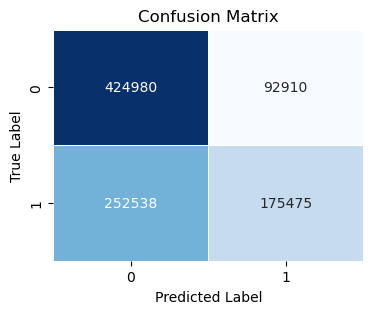

In [117]:
show_confusion_matrix(y_test, y_pred_dt)

In [118]:
# Save the model to a file
dump(dtc, 'model_dt.joblib')

['model_dt.joblib']

## Boosting Algorithm

The objective of this part is to create a new classification model from sequences of decision trees like dtc defined above.

Create a classifier again, using the AdaBoostClassifier class. Train the algorithm.
Calculate the accuracy of the new classification model on the test sample.

In [120]:
# WARNING: This call can take a few minutes
from sklearn.ensemble import AdaBoostClassifier

ac_boosting = AdaBoostClassifier(estimator = dtc, n_estimators = 2)
ac_boosting.fit(X_train, y_train)

/Users/mihrandovlatyan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=2)

In [121]:
accuracy_test_ac = ac_boosting.score(X_test, y_test)
print(accuracy_test_ac)
print("This boosting model achieved an accuracy of approximately {:.2f}% on the test set.".format(accuracy_test_ac * 100))

0.6346697282913787
This boosting model achieved an accuracy of approximately 63.47% on the test set.


In [122]:
accuracy_train_ac = ac_boosting.score(X_train, y_train)
print(accuracy_train_ac)
print("This boosting model achieved an accuracy of approximately {:.2f}% on the train set.".format(accuracy_train_ac * 100))

0.6354211019161864
This boosting model achieved an accuracy of approximately 63.54% on the train set.


Print the confusion matrix of the test set.

In [123]:
y_pred_ac_boosting = ac_boosting.predict(X_test)

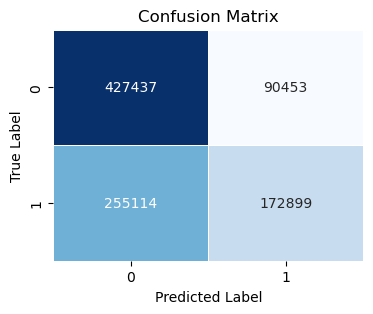

In [124]:
show_confusion_matrix(y_test, y_pred_ac_boosting)

The results obtained are the as the simple decision tree. Adaboost is an algorithm applicable to many domains by a good choice of basic classifiers. This technique is adapted to multi-label problems and allows to classify outliers well.

In [125]:
# Save the model to a file
dump(ac_boosting, 'model_boosting.joblib')

['model_boosting.joblib']

## Bagging or Bootstrap AGGregatING

The term Bagging comes from the contraction of Boostrap Aggregating. The general method of Bagging consists mainly in training a model on different subsets of the same size as the initial sample, using the Bootstrap technique, i.e. a random draw with discount. The method thus builds a set of independent estimators, unlike Boosting, which are then aggregated (or bagged) into a meta-model, with a majority vote for the classification, and a mean for the regression.

Unlike Boosting, choosing a large number of estimators will not result in additional risk of overfitting. Indeed, the higher the number of estimators, the more the bias of the final model will be equivalent to the average of the aggregated biases and the variance will decrease as the estimators that are aggregated will be decorrelated. It is therefore in our interest to choose the highest possible number of estimators, depending on the time we wish to allow for the training process.

The prediction error computed, in general, for Bagging methods is the so-called Out Of Bag (OOB) error, i.e. for each observation the average of the errors for all the models trained on a bootstrap sample of which it is not a part is computed. This technique helps to prevent over-fitting.

Create a classifier again, using the BaggingClassifier class. Train the algorithm. Print the Out Of Bag error of the model.

In [126]:
from sklearn.ensemble import BaggingClassifier

# WARNING: This call can take a few minutes

# Creation of the classifier and construction of the model on the training set
bc_bagging = BaggingClassifier(estimator = dtc, n_estimators = 10)
bc_bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3))

Calculate the accuracy of the new classification model on the test and train samples.

In [127]:
accuracy_test_bagging = bc_bagging.score(X_test, y_test)
print(accuracy_test_bagging)
print("This bagging model achieved an accuracy of approximately {:.2f}% on the test set.".format(accuracy_test_bagging * 100))

accuracy_train_bagging = bc_bagging.score(X_train, y_train)
print(accuracy_train_bagging)
print("This bagging model achieved an accuracy of approximately {:.2f}% on the train set.".format(accuracy_train_bagging * 100))

0.6347955340029581
This bagging model achieved an accuracy of approximately 63.48% on the test set.
0.6355870810118065
This bagging model achieved an accuracy of approximately 63.56% on the train set.


Print the confusion matrix of the test set.

In [128]:
y_pred_bagging = bc_bagging.predict(X_test)

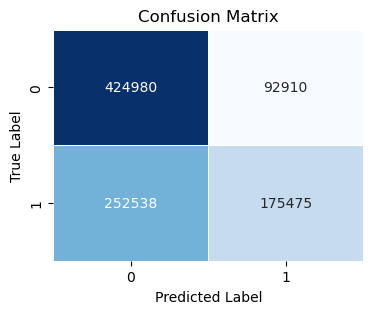

In [129]:
show_confusion_matrix(y_test, y_pred_bagging)

The results obtained with Bagging are the same as the first models.

Create a dictionary parameters containing the possible values taken for the parameter:

In [130]:
param_grid_bagging = {
    'max_features': [0.5, 1.0],
    'max_samples': [0.5, 1.0],
    'n_estimators': [10, 20]
}
param_grid_bagging

{'max_features': [0.5, 1.0],
 'max_samples': [0.5, 1.0],
 'n_estimators': [10, 20]}

In [131]:
from sklearn.model_selection import GridSearchCV

grid_bc_bagging = GridSearchCV(estimator = bc_bagging, param_grid = param_grid_bagging)

# WARNING: This call can take up to 30 minutes.

# Perform grid search with cross-validation
grid_bagging = grid_bc_bagging.fit(X_train, y_train)

Following results displays all possible combinations of hyperparameters and the average performance of the associated model by cross validation.

In [132]:
print(pd.DataFrame.from_dict(grid_bagging.cv_results_).loc[:,['params', 'mean_test_score']])

                                              params  mean_test_score
0  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...         0.626650
1  {'max_features': 0.5, 'max_samples': 0.5, 'n_e...         0.627056
2  {'max_features': 0.5, 'max_samples': 1.0, 'n_e...         0.625253
3  {'max_features': 0.5, 'max_samples': 1.0, 'n_e...         0.626787
4  {'max_features': 1.0, 'max_samples': 0.5, 'n_e...         0.635916
5  {'max_features': 1.0, 'max_samples': 0.5, 'n_e...         0.635587
6  {'max_features': 1.0, 'max_samples': 1.0, 'n_e...         0.635587
7  {'max_features': 1.0, 'max_samples': 1.0, 'n_e...         0.635587


In [133]:
# Print the best hyperparameters found
print("Best hyperparameters:", grid_bc_bagging.best_params_)

Best hyperparameters: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 10}


Evaluate the best model from best_estimator_ attribute on the test and train sets.

In [134]:
# Evaluate the best model on the test set
best_model_bagging = grid_bc_bagging.best_estimator_

In [135]:
accuracy_test_bagging = best_model_bagging.score(X_test, y_test)
print(accuracy_test_bagging)
print("This bagging model achieved an accuracy of approximately {:.2f}% on the test set.".format(accuracy_test_bagging * 100))

0.6347955340029581
This bagging model achieved an accuracy of approximately 63.48% on the test set.


In [136]:
accuracy_train_bagging = best_model_bagging.score(X_train, y_train)
print(accuracy_train_bagging)
print("This bagging model achieved an accuracy of approximately {:.2f}% on the train set.".format(accuracy_train_bagging * 100))

0.6355870810118065
This bagging model achieved an accuracy of approximately 63.56% on the train set.


In [137]:
# Save the best model to a file
dump(best_model_bagging, 'model_best_bagging.joblib')

['model_best_bagging.joblib']

Bagging is a simple and robust ensemble method that reduces variance when predictors are unstable. Its estimation of the prediction error by Bootstrap prevents over-fitting.

## Conclusion for Boosting and Bagging

The accuracy of the bagging and boosting models on the test dataset was observed to be approximately 63%. This indicates that the models correctly classified 63% of instances.

To gain a deeper understanding of the model's performance, various evaluation metrics were employed, including confusion matrix, accuracy.

While the bagging and boosting models achieved a moderate level of accuracy, ongoing refinement and evaluation are necessary to develop a robust and reliable predictive model for the given task.

# NBA player shot analysis with Random Forests

In this section, we will create Random Forests model. The packages used will be pandas, scikit-learn and its subpackages, namely ensemble, and joblib.

This task centers on exploring the parameters that may impact the shot outcomes of NBA players. The dataset under analysis contains quantitative variables.

In [138]:
X_train, X_test, y_train, y_test = load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

## Classification by random forests

Let's create a clf Classifier, using the RandomForestClassifier method of the ensemble package.
Then train the algorithm on the training set (X_train and y_train).

In [140]:
# WARNING: This call can take a few minutes
from sklearn import ensemble

# if `n_jobs = -1`, all available cores on the machine will be used
clf_rf = ensemble.RandomForestClassifier(n_jobs = -1, random_state = 321)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=321)

## Evaluation of the classification model 

In [141]:
accuracy_test_rf = clf_rf.score(X_test, y_test)
print(accuracy_test_rf)
print("This random forests model achieved an accuracy of approximately {:.2f}% on the test set.".format(accuracy_test_rf * 100))

0.6445935788341933
This random forests model achieved an accuracy of approximately 64.46% on the test set.


In [142]:
accuracy_train_rf = clf_rf.score(X_train, y_train)
print(accuracy_train_rf)
print("This random forests model achieved an accuracy of approximately {:.2f}% on the train set.".format(accuracy_train_rf * 100))

0.9999994714041541
This random forests model achieved an accuracy of approximately 100.00% on the train set.


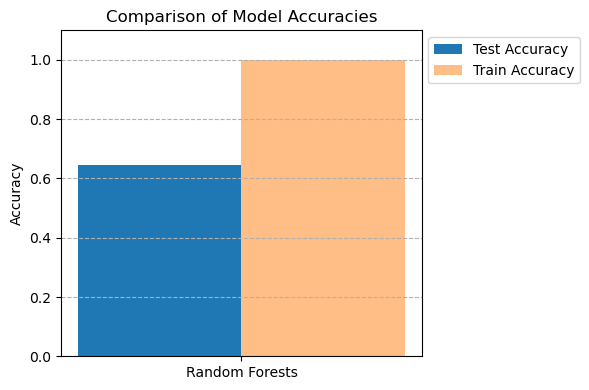

In [143]:
# Sample data for Random Forests model
models = ['Random Forests']
train_accuracies = [accuracy_train_rf]  # Replace with actual train accuracy
test_accuracies = [accuracy_test_rf]  # Replace with actual test accuracy

# Define colors for train and test bars
test_color = '#1f77b4'  # blue
train_color = '#ff7f0e'  # orange

# Define the width of each bar
bar_width = 0.35

# Define the x positions for the single model
x = np.arange(len(models))

# Create a figure with larger size
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the size as needed

# Plot the bars for test accuracies
test_bars = ax.bar(x - bar_width/2, test_accuracies, width=bar_width, color=test_color, label='Test Accuracy')

# Plot the bars for train accuracies
train_bars = ax.bar(x + bar_width/2, train_accuracies, width=bar_width, color=train_color, alpha=0.5, label='Train Accuracy')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models)  # Use model names as x-axis labels

# Set the title, labels, and legend
ax.set_title('Comparison of Model Accuracies')
ax.set_ylabel('Accuracy')

# Move the legend to the upper left outside the plot area
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set y-axis limits to ensure all bars are visible
ax.set_ylim(0, max(max(train_accuracies), max(test_accuracies)) + 0.1)  # Add a buffer for visibility

# Show grid lines on both axes, set them behind the bars
ax.grid(True, linestyle='--', axis='y', zorder=0)

# Show the plot
plt.tight_layout()
plt.show()


These numbers indicate that our Random Forest classifier is overfitting the training data, as it performs nearly perfectly on the training set but struggles to generalize to new, unseen data (as evidenced by the lower testing accuracy). It might be beneficial to explore methods to reduce overfitting, such as hyperparameter tuning, feature selection, or using more data for training if possible.

Create a dictionary parameters containing the possible values taken for the parameter. 

In [144]:
param_grid_rf = {
    'max_depth': [10],            # Maximum depth of the trees
    'min_samples_leaf': [1, 2],   # Minimum number of samples required to be at a leaf node
    'min_samples_split': [2, 3],  # Minimum number of samples required to split an internal node
    'n_estimators': [5, 10],      # Number of trees in the forest    
    'n_jobs': [-1]                # Utilize multiple CPU cores
}
param_grid_rf

{'max_depth': [10],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 3],
 'n_estimators': [5, 10],
 'n_jobs': [-1]}

Apply the function model_selection.GridSearchCV() to the clf model, specifying in the param_grid argument the parameter grid created above. Return the classifier thus created in grid_clf. The scoring argument allows us to choose the metric we want to use to evaluate the performance of the models, by default it is accuracy.

In [145]:
from sklearn.model_selection import GridSearchCV

grid_clf_rf = GridSearchCV(estimator = clf_rf, param_grid = param_grid_rf)

Train grid_clf_rf on the training set, (X_train, y_train). Save the results in the grid object.

In [146]:
# WARNING: This call can take up to 10 minutes

# Fit the grid search
grid_rf = grid_clf_rf.fit(X_train, y_train)

Following results displays all possible combinations of hyperparameters and the average performance of the associated model by cross validation.

In [147]:
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,['params', 'mean_test_score']])

                                              params  mean_test_score
0  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.637314
1  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.640048
2  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.636880
3  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.638332
4  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.634464
5  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.637940
6  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.634464
7  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.637940


The best_params_ attribute of the created model allows to display the parameters having given the best score and retained by default.

In [148]:
print(grid_clf_rf.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


Now make class predictions using the grid_clf model on the test set and store them in the y_pred variable, and print a confusion matrix from these predictions.

In [149]:
# Prediction of the test features and creation of the confusion matrix
y_pred_gcv_rf = grid_clf_rf.predict(X_test)

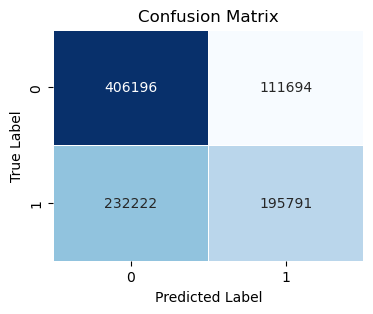

In [150]:
show_confusion_matrix(y_test, y_pred_gcv_rf)

The confusion matrix is non better than that obtained at the beginning of this paragraph. This because we used 'max_depth' = 10 in grid search, while in first result we have 'max_depth' = None. This allows the trees to expand until all leaves are pure or until all leaves contain less than min_samples_split samples, effectively allowing the trees to grow without any depth limit. 

The tuning of hyperparameters is thus a very useful and essential step when creating models, especially when one has several important hyperparameters, such as random forests, and is thus not to be neglected.

Evaluate the best model from best_estimator_ attribute on the test and train sets.

In [151]:
# Evaluate the best model on the test set
best_model_rf = grid_clf_rf.best_estimator_

In [152]:
accuracy_test_rf = best_model_rf.score(X_test, y_test)
print(accuracy_test_rf)
print("This random forests model achieved an accuracy of approximately {:.2f}% on the test set.".format(accuracy_test_rf * 100))

0.6364151503906849
This random forests model achieved an accuracy of approximately 63.64% on the test set.


In [153]:
accuracy_train_rf = best_model_rf.score(X_train, y_train)
print(accuracy_train_rf)
print("This random forests model achieved an accuracy of approximately {:.2f}% on the train set.".format(accuracy_train_rf * 100))

0.6382379891791145
This random forests model achieved an accuracy of approximately 63.82% on the train set.


In [154]:
# Save the best model to a file
dump(best_model_rf, 'model_best_rf.joblib')

['model_best_rf.joblib']

### Classification report

The function classification_report() of the sklearn.metrics sub-module allows to display some of these additional metrics, with as arguments the vector of true labels, and the vector of predicted labels.

Display the classification report of our predictions.

In [155]:
print(classification_report(y_test, y_pred_gcv_rf))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70    517890
           1       0.64      0.46      0.53    428013

    accuracy                           0.64    945903
   macro avg       0.64      0.62      0.62    945903
weighted avg       0.64      0.64      0.63    945903



The F1-score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. For class 0, the F1-score is 0.70, while for class 1, it is 0.53. This suggests that the model achieves a better balance between precision and recall for class 0 compared to class 1.

The overall accuracy of the model is 64%, indicating that approximately 64% of all instances are correctly classified. 

## Conclusion for Random Forests

The accuracy of the random forests model on the test dataset was observed to be approximately 64%. This indicates that the model correctly classified 64% of instances.

To gain a deeper understanding of the model's performance, various evaluation metrics were employed, including confusion matrix, accuracy, precision, recall, F1-score.

While the random forests classification model achieved a moderate level of accuracy, ongoing refinement and evaluation are necessary to develop a robust and reliable predictive model for the given task.

# Comparison of basic Models

## Comparison of Hyperparameters for each Model

Hyperparameter Space for each Model

| Model Type          | Hyperparameters                                                                           |
|---------------------|-------------------------------------------------------------------------------------------|
| Logistic Regression | C: [0.01, 1, 100], penalty: l2, solver: liblinear                                         |
| Bagging             | max_features: [0.5, 1.0], max_samples: [0.5, 1.0], n_estimators: [10, 20]                 |
| Random Forests      | max_depth: 10, min_samples_leaf: [1, 2], min_samples_split: [2, 3], n_estimators: [5, 10],| |                     |  n_jobs: -1                                                                               |

Best Hyperparameters of each Model

| Model Type          | Best Hyperparameters                                | Training Accuracy  | Test Accuracy  |
|---------------------|-------------------------------------------------------------------------------------------|
| Logistic Regression | C: 1, penalty: l2, solver: liblinear                |       0.62036      |    0.62012     |
| Bagging             | max_features: 1.0, max_samples: 0.5,                |       0.63558      |    0.63479     |
|                     |  n_estimators: 10                                   |                    |                |
| Random Forests      | max_depth: 10, min_samples_leaf: 1,                 |       0.63823      |    0.63641     |
|                     |  min_samples_split: 2, n_estimators: 10, n_jobs: -1 |                    |                |

## Comparison of Accuracies for each Model

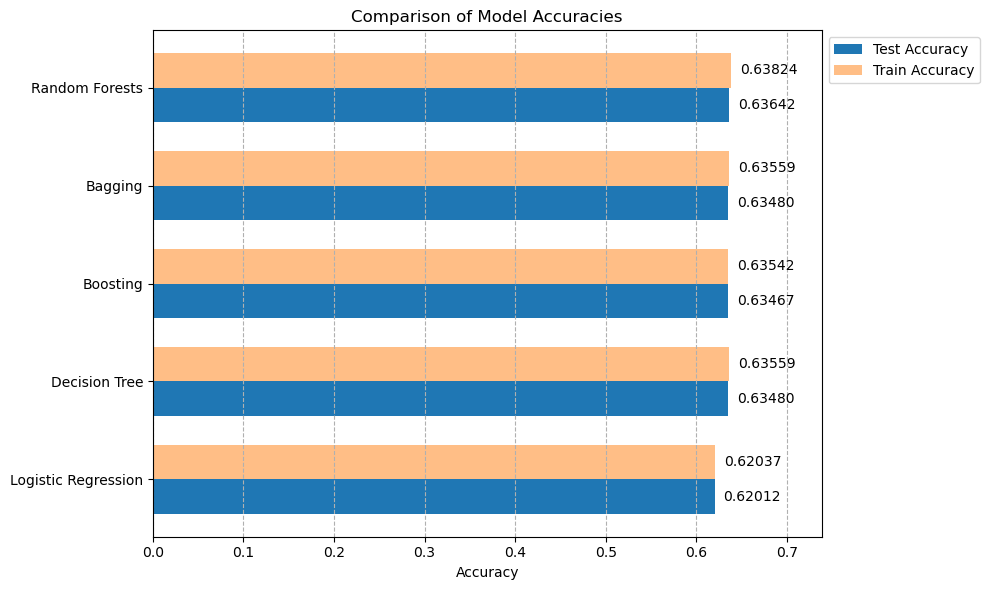

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual values for each model)
models = ['Logistic Regression', 'Decision Tree', 'Boosting', 'Bagging', 'Random Forests']
train_accuracies = [accuracy_train_lr, accuracy_train_dt, accuracy_train_ac, accuracy_train_bagging, accuracy_train_rf]
test_accuracies = [accuracy_test_lr, accuracy_test_dt, accuracy_test_ac, accuracy_test_bagging, accuracy_test_rf]

# Define colors for train and test bars
test_color = '#1f77b4'  # blue
train_color = '#ff7f0e'  # orange

# Define the height of each bar
bar_height = 0.35

# Define the y positions for each model
y = np.arange(len(models))

# Create a figure with larger size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed

# Plot the bars for test accuracies
test_bars = ax.barh(y - bar_height/2, test_accuracies, height=bar_height, color=test_color, label='Test Accuracy')

# Plot the bars for train accuracies
train_bars = ax.barh(y + bar_height/2, train_accuracies, height=bar_height, color=train_color, alpha=0.5, label='Train Accuracy')

# Set the y-axis ticks and labels
ax.set_yticks(y)
ax.set_yticklabels(models)  # Use model names as y-axis labels

# Set the title, labels, and legend
ax.set_title('Comparison of Model Accuracies')
ax.set_xlabel('Accuracy')

# Move the legend to the upper left outside the plot area
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set x-axis limits to ensure all bars are visible
ax.set_xlim(0, max(max(train_accuracies), max(test_accuracies)) + 0.1)  # Add a buffer for visibility

# Show grid lines on both axes, set them behind the bars
ax.grid(True, linestyle='--', axis='x', zorder=0)

# Annotate the bars with accuracy values
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    ax.text(train_acc + 0.01, i + bar_height/2, f'{train_acc:.5f}', va='center')
    ax.text(test_acc + 0.01, i - bar_height/2, f'{test_acc:.5f}', va='center')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Note: Random Forest model showed the highest accuracy score for the training and test data sets.

Since the train and test accuracies are very close, making it difficult to visually distinguish them in a bar chart, we are going to use a different type of plot that emphasizes the comparison more clearly. We will plot the difference between train and test accuracies for each model. This can highlight cases where overfitting or underfitting occurs.

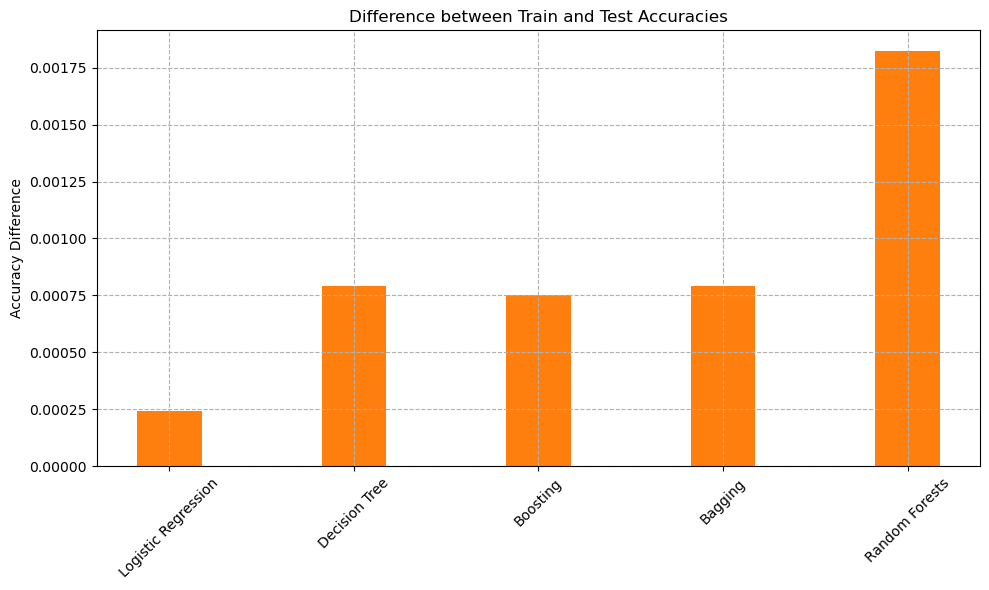

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual values for each model)
models = ['Logistic Regression', 'Decision Tree', 'Boosting', 'Bagging', 'Random Forests']
train_accuracies = [accuracy_train_lr, accuracy_train_dt, accuracy_train_ac, accuracy_train_bagging, accuracy_train_rf]
test_accuracies = [accuracy_test_lr, accuracy_test_dt, accuracy_test_ac, accuracy_test_bagging, accuracy_test_rf]

# Calculate the differences between train and test accuracies
accuracy_differences = [train - test for train, test in zip(train_accuracies, test_accuracies)]

# Define colors for the bars
difference_color = '#ff7f0e'  # orange

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.35

# Define the x positions for each model
x = np.arange(len(models))

# Plot the bars for accuracy differences
difference_bars = ax.bar(x, accuracy_differences, width=bar_width, color=difference_color)

# Set the x-axis ticks and labels with rotation and centered alignment
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='center')  # Rotate labels by 45 degrees and center align

# Set the title, labels, and legend
ax.set_title('Difference between Train and Test Accuracies')
ax.set_ylabel('Accuracy Difference')

# Show grid lines on both axes, set them behind the bars
ax.grid(True, linestyle='--', zorder=0)

# Show the plot
plt.tight_layout()
plt.show()


Note: Random Forest model has the highest accuracy difference between train and test sets, but that is not high to say that we have an overfitting.

## Comparison of Confusion Matrix for each Model

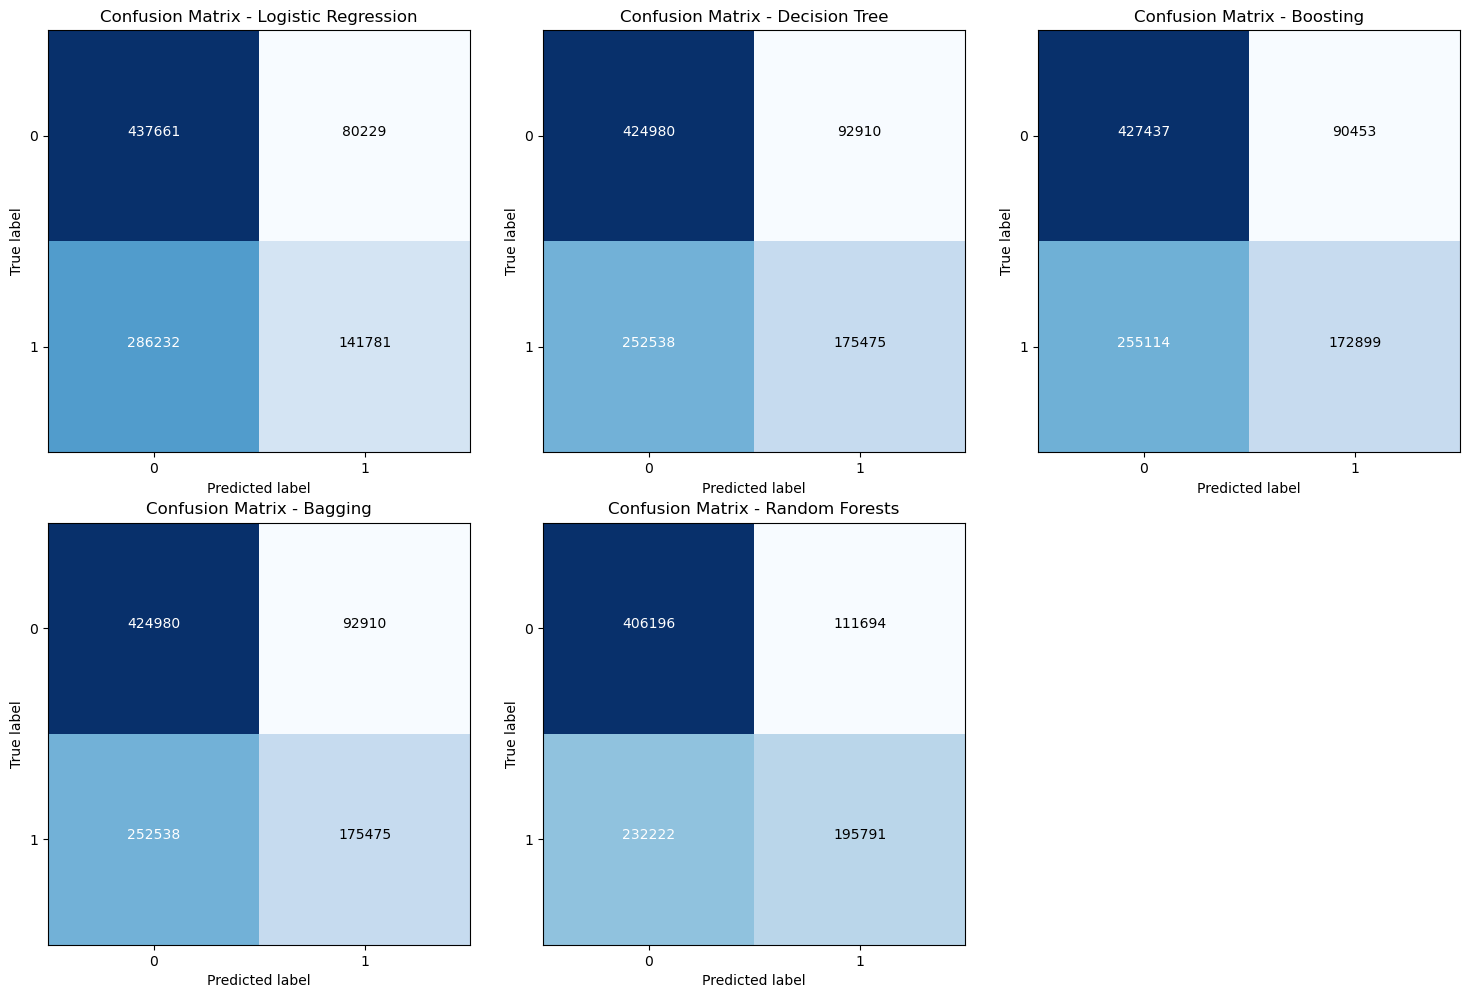

In [159]:
from itertools import product

# Initialize machine learning models
model_lr = load('model_best_lr.joblib')
model_dt = load('model_dt.joblib')
model_boosting = load('model_boosting.joblib')
model_bagging = load('model_best_bagging.joblib')
model_rf = load('model_best_rf.joblib')

models = {
    'Logistic Regression': model_lr,
    'Decision Tree': model_dt,
    'Boosting': model_boosting,
    'Bagging': model_bagging,
    'Random Forests': model_rf
}

# Determine the grid dimensions based on the number of models
num_models = len(models)
num_rows = (num_models + 2) // 3  # Ensure at least 1 row
num_cols = min(num_models, 3)

# Create the plot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
axs = axs.flatten()
for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix with numbers
    axs[idx].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axs[idx].set_title(f'Confusion Matrix - {name}')
    axs[idx].set_xticks(np.arange(2))
    axs[idx].set_yticks(np.arange(2))
    axs[idx].set_xticklabels(['0', '1'])
    axs[idx].set_yticklabels(['0', '1'])
    
    # Display the numbers in each cell
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        axs[idx].text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        
    # Add x and y labels
    axs[idx].set_xlabel('Predicted label')
    axs[idx].set_ylabel('True label')
    
# Hide any extra subplots
for ax in axs[num_models:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


Note: The illustration of confusion matrices reveals a relatively big number of true positives for Random Forests model.

## Comparison of ROC Curves for each Model

/Users/mihrandovlatyan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


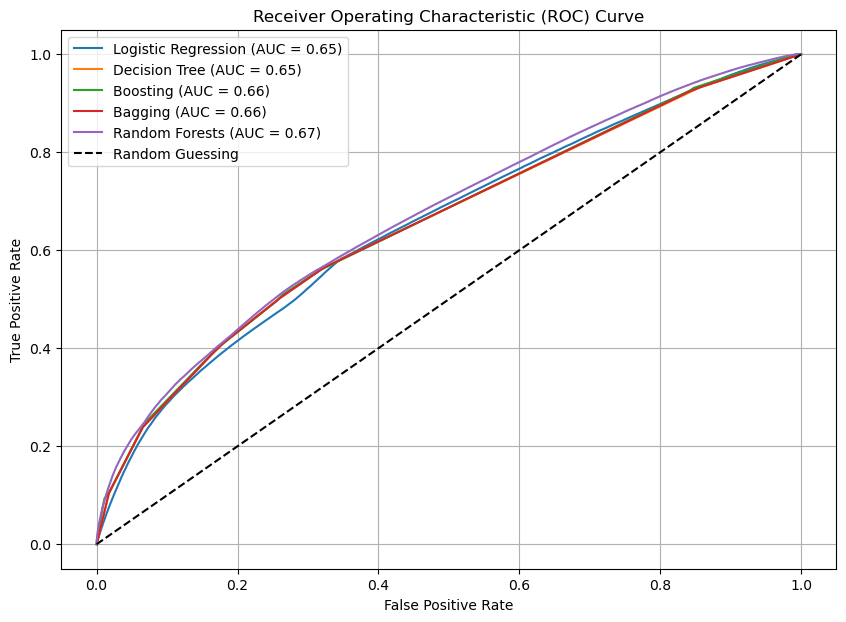

In [160]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize models
models = [
    ('Logistic Regression', model_lr),
    ('Decision Tree', model_dt),
    ('Boosting', model_boosting),
    ('Bagging', model_bagging),
    ('Random Forests', model_rf)
]

# Train and plot ROC curves for each model
plt.figure(figsize=(10, 7))
for name, model in models:
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


Note. The ROC shows that all models struggle to increase sensitivity without disproportionately increasing specificity. As our goal is to increase recall, this means that these models will further increase false positives significantly. In addition, the AUC shows us that the overall accuracy across all models is similarly.

# NBA player shot analysis with Deep Learning (CNN, LeNet architecture)

The main objective of this part is to perform a reproduction of the Convolutional Neural Network (CNN) algorithm LeNet5 on Python with the Keras module. The LeNet architecture is one of the simplest to implement and one of the most important in Deep Learning as it is the backbone of many more complex models.

The LeNet architecture was introduced by Yann LeCun in November 1998. We will construct the architecture of the LeNet network, then we will train this algorithm on the same data as in the previous models. The LeNet network includes two convolution layers, two pooling layers, and dropout layers.

In [18]:
%matplotlib inline
import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras import models, layers, Input
from keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

import itertools

from joblib import load

import time

import pickle

Read the train and test sets from the file 'NBA Shot Locations 1997 - 2020-Report2-train-test.joblib'.

In [19]:
X_train, X_test, y_train, y_test = load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

## Standardization

To ensure optimal performance of our model, it would be advisable to perform scaling before applying our classification. We will only scale the numerical features and not the encoded categorical features or the target column 'Shot Made Flag'. Also, the scaling is not necessary for columns generated from frequency encoding as their values are already in the range [0, 1].

In [20]:
# Initialize the StandardScaler
scaler = StandardScaler()

columns_to_scale = ['Period',
                    'Minutes Remaining',
                    'Seconds Remaining', 
                    'Shot Distance', 
                    'X Location', 
                    'Y Location']

# Scale the features for train set and replace the original columns with the scaled features
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Scale the features for test set and replace the original columns with the scaled features
X_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])


Show the dimension of train dataset.

In [21]:
X_train.shape

(3783609, 39)

By reducing the dimensionality of the data, PCA can help in capturing the most important features or patterns in the data, which can lead to improved model performance. It can also help in mitigating issues like overfitting, especially when the original dataset has a large number of features.

In [22]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
X_train_pca.shape

(3783609, 20)

Transform the X_train data into a 4-dimensional array (nb_images, width, height, depth). Each data point will be resized to the format (4, 5, 1). Apply the same transformation to the X_test data.

In [24]:
# Reshape input data for CNN
X_train_reshaped = X_train_pca.reshape(-1, 4, 5, 1)  # Adjust based on PCA components
X_test_reshaped = X_test_pca.reshape(-1, 4, 5, 1)

Let's define some callbacks which will regulate our model training.

In [25]:
from keras.callbacks import Callback

# Define a learning rate schedule function
def lr_schedule(epoch):
    lr = 1e-3  # Initial learning rate
    if epoch > 10:
        lr *= 0.1  # Reduce learning rate by a factor of 0.1 after 10 epochs
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Define a ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',   # Monitor validation loss for reducing learning rate
    factor = 0.2,           # Reduce learning rate by a factor of 0.2
    patience = 3,           # Number of epochs with no improvement before reducing LR
    min_lr = 1e-6           # Minimum learning rate threshold
)

# Define a custom callback to print progress every n epochs
class PrintProgress(Callback):
    def __init__(self, print_interval):
        super(PrintProgress, self).__init__()
        self.print_interval = print_interval

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.print_interval == 0:
            print(f"Epoch {epoch+1}/{self.params['epochs']} - loss: {logs['loss']:.4f} - accuracy: {logs['accuracy']:.4f} - val_loss: {logs['val_loss']:.4f} - val_accuracy: {logs['val_accuracy']:.4f}")

# Define the interval for printing progress
print_interval = 10

# Create the custom callback instance
print_progress_callback = PrintProgress(print_interval)

Create the CNN model with LeNet architecture.

In [26]:
# Define the input shape
input_shape = (4, 5, 1)

# Create an Input layer
input_layer = Input(shape = input_shape)

x = layers.Conv2D(128, kernel_size = (3, 3), activation = 'leaky_relu', padding = 'same')(input_layer)
x = layers.MaxPooling2D(pool_size = (2, 2))(x)
x = layers.Conv2D(64, kernel_size = (3, 3), activation = 'leaky_relu', padding = 'same')(x)
x = layers.MaxPooling2D(pool_size = (2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation = 'leaky_relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation = 'leaky_relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation = 'leaky_relu')(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(1, activation = 'sigmoid')(x)

# Create the model
lenet = models.Model(inputs = input_layer, outputs = output_layer)

Compile the model and show the summary.

In [27]:
# Compile the model
lenet.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'mean_absolute_error'])

# Print model summary
print(lenet.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 5, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 5, 128)      │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,761 (366.25 KB)

 Trainable params: 93,761 (366.25 KB)

 Non-trainable params: 0 (0.00 B)

None


Train the model.

In [28]:
# WARNING: This call can take a few hours.

# Record start time
start_time = time.time()

# Train the CNN model with the custom callback
history = lenet.fit(X_train_reshaped, 
                    y_train, 
                    epochs=50, 
                    batch_size=128, 
                    validation_data=(X_test_reshaped, y_test),
                    callbacks=[reduce_lr, lr_scheduler, print_progress_callback],
                    verbose=0)  # Set verbose to 0 to hide training output

# Record end time
end_time = time.time()

# Calculate duration in seconds
duration_seconds = end_time - start_time
# Convert duration to minutes and seconds
duration_minutes, duration_seconds = divmod(duration_seconds, 60)
print(f"Training duration: {int(duration_minutes)} min {int(duration_seconds)} sec")

Epoch 1/50 - loss: 0.6487 - accuracy: 0.6296 - val_loss: 0.6410 - val_accuracy: 0.6346
Epoch 11/50 - loss: 0.6437 - accuracy: 0.6359 - val_loss: 0.6434 - val_accuracy: 0.6366
Epoch 21/50 - loss: 0.6400 - accuracy: 0.6392 - val_loss: 0.6384 - val_accuracy: 0.6391
Epoch 31/50 - loss: 0.6396 - accuracy: 0.6394 - val_loss: 0.6378 - val_accuracy: 0.6393
Epoch 41/50 - loss: 0.6393 - accuracy: 0.6396 - val_loss: 0.6379 - val_accuracy: 0.6393
Training duration: 112 min 51 sec


Save the history object to a file that later we can use it.

In [36]:
from tensorflow.keras.models import save_model

# Save the trained model with optimizer state
save_model(lenet, 'model_lenet.keras', include_optimizer=True)

Display the training history for each epoch.

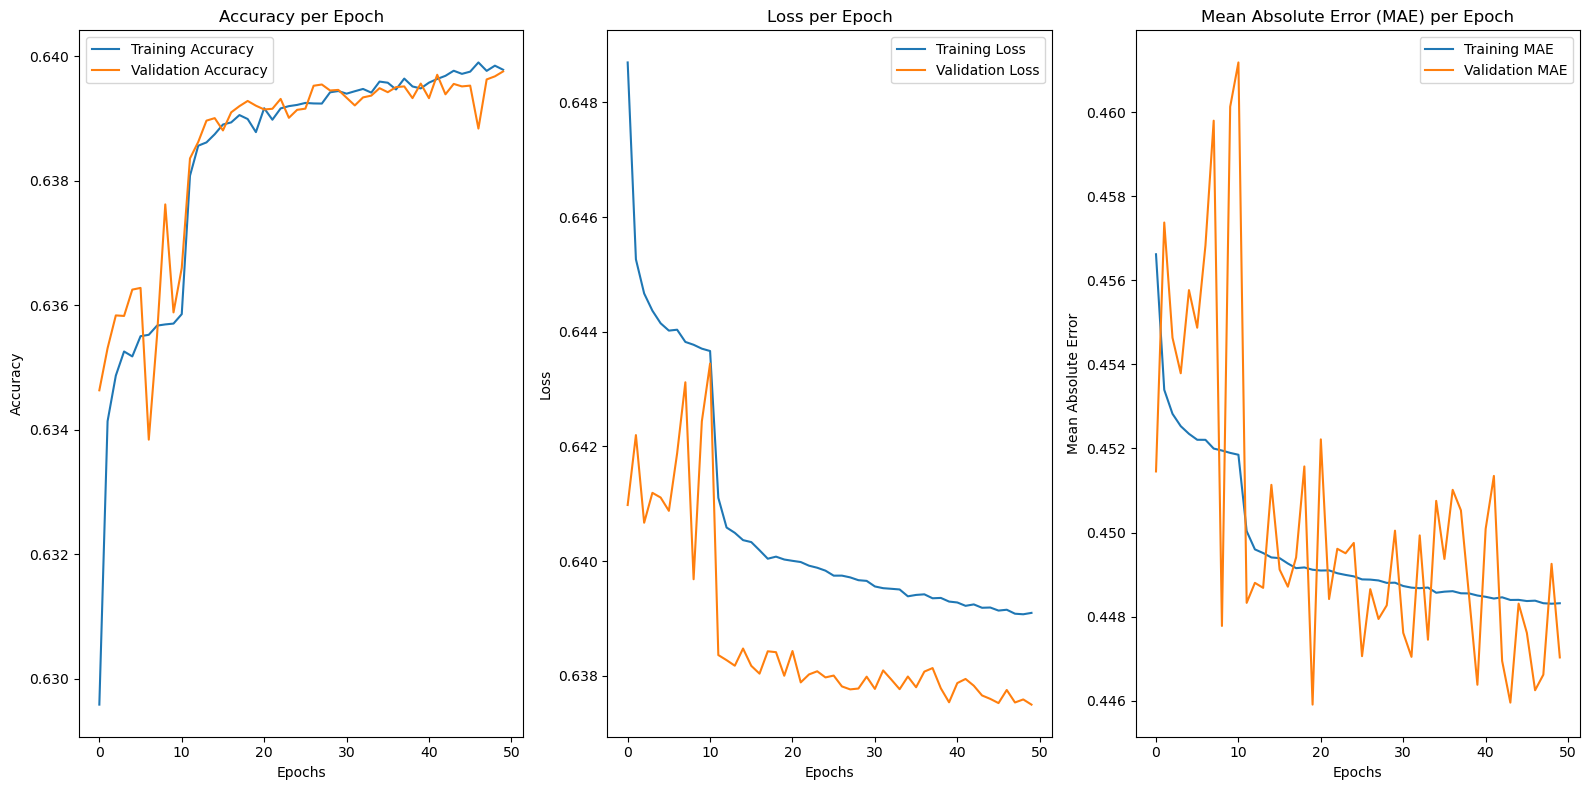

In [33]:
# In the variables train_loss and val_loss, store the historical evolution of the loss function at each epoch.
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

train_mae = history.history["mean_absolute_error"]
val_mae = history.history["val_mean_absolute_error"]

# display the evolution of the cost function and precision as a function of epoch.
# plot training and validation accuracy
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')

# Plot training and validation loss
plt.subplot(1, 3, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')

# Plot training and validation accuracy again (for MAE)
plt.subplot(1, 3, 3)
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Mean Absolute Error (MAE) per Epoch')

plt.tight_layout()
plt.show()

Evaluate the model on test data.

In [177]:
# Evaluate the model on test data
evaluation_results = lenet.evaluate(X_test_reshaped, y_test)

# Extract test loss and test accuracy from evaluation_results
test_loss = evaluation_results[0]
test_accuracy = evaluation_results[1]

# Print test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

29560/29560 ━━━━━━━━━━━━━━━━━━━━ 23s 762us/step - accuracy: 0.6406 - loss: 0.6373 - mean_absolute_error: 0.4494
Test Accuracy: 63.99%


Display a detailed evaluative report of the model's performance using the classification report function.

In [178]:
# Make predictions
y_pred = lenet.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_binary))

29560/29560 ━━━━━━━━━━━━━━━━━━━━ 22s 746us/step
              precision    recall  f1-score   support

           0       0.63      0.81      0.71    517890
           1       0.66      0.43      0.52    428013

    accuracy                           0.64    945903
   macro avg       0.64      0.62      0.62    945903
weighted avg       0.64      0.64      0.62    945903



### Curiosity training on Epoch = 500

In the previous diagram, you might notice a small jump in accuracy starting from Epoch 12, followed by a gradual increase. Intrigued by this observation, we ran the same code with an Epoch value of 500 to explore how much further the accuracy could improve. Here are the results.

    Epoch 1/500 - loss: 0.6487 - accuracy: 0.6297 - val_loss: 0.6418 - val_accuracy: 0.6336
    Epoch 101/500 - loss: 0.6380 - accuracy: 0.6410 - val_loss: 0.6373 - val_accuracy: 0.6397
    Epoch 201/500 - loss: 0.6369 - accuracy: 0.6417 - val_loss: 0.6381 - val_accuracy: 0.6393
    Epoch 301/500 - loss: 0.6361 - accuracy: 0.6421 - val_loss: 0.6386 - val_accuracy: 0.6387
    Epoch 401/500 - loss: 0.6355 - accuracy: 0.6426 - val_loss: 0.6386 - val_accuracy: 0.6386
    Epoch 491/500 - loss: 0.6351 - accuracy: 0.6427 - val_loss: 0.6385 - val_accuracy: 0.6385
    Training duration: 1236 min 37 sec

In [10]:
history = load('lenet_training_history_leaky_relu-500.joblib')

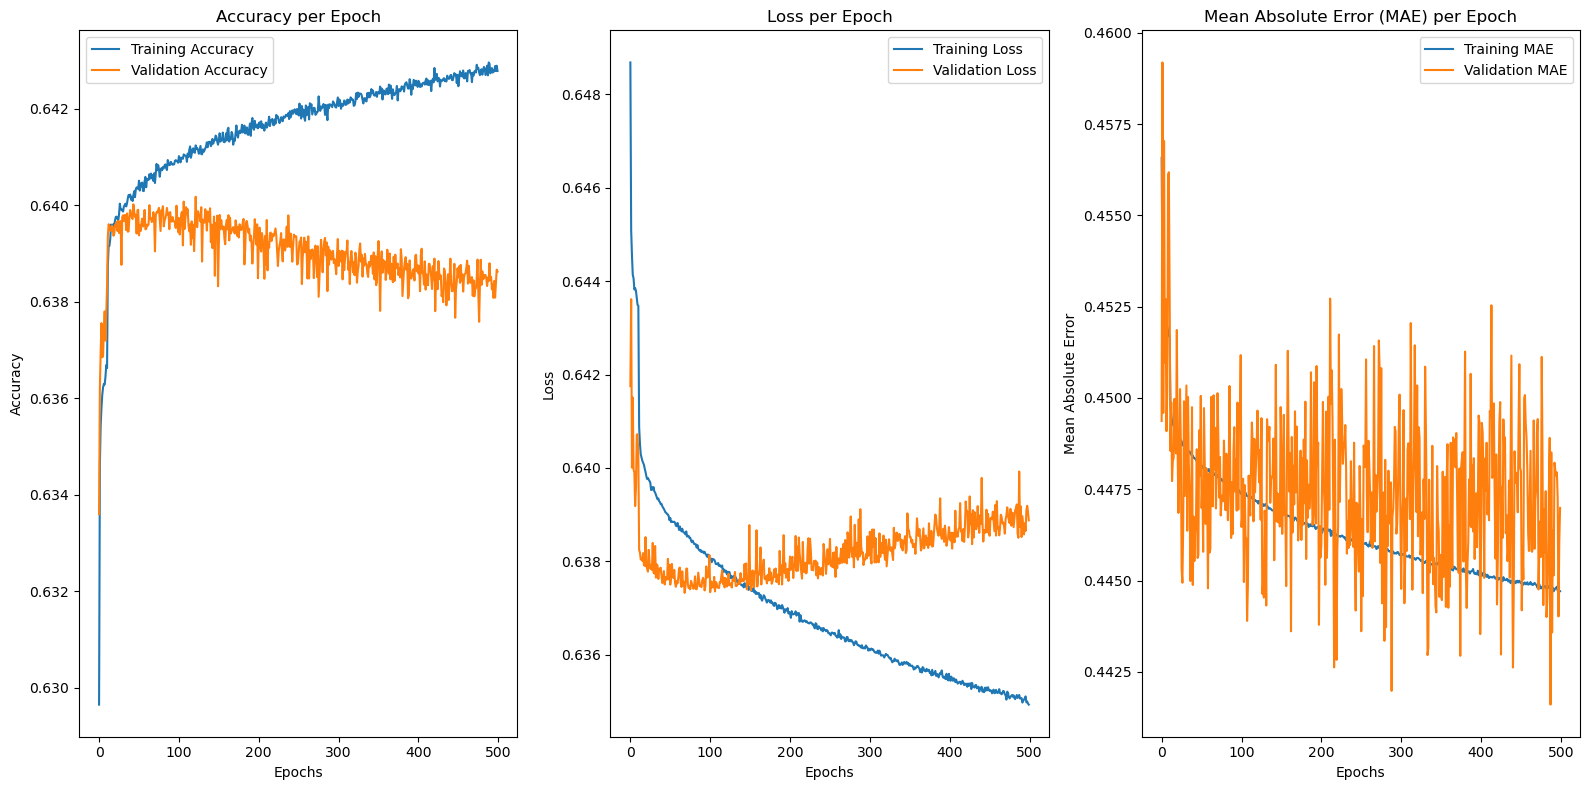

In [14]:
import matplotlib.pyplot as plt

# In the variables train_loss and val_loss, store the historical evolution of the loss function at each epoch.
train_acc = history["accuracy"]
val_acc = history["val_accuracy"]

train_loss = history["loss"]
val_loss = history["val_loss"]

train_mae = history["mean_absolute_error"]
val_mae = history["val_mean_absolute_error"]

# display the evolution of the cost function and precision as a function of epoch.
# plot training and validation accuracy
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')

# Plot training and validation loss
plt.subplot(1, 3, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')

# Plot training and validation accuracy again (for MAE)
plt.subplot(1, 3, 3)
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Mean Absolute Error (MAE) per Epoch')

plt.tight_layout()
plt.show()

The model's performance during training and validation shows several key trends across different metrics. Initially, both training and test accuracies show an improvement up to a certain epoch, reaching their peak values. However, beyond this point, the trends diverge: while the training accuracy continues to improve slightly, the test accuracy starts to decrease gradually. This divergence indicates a potential issue with overfitting, where the model may be learning to perform well on the training data but struggles to generalize to new, unseen data.

### Hyperparameters

We also simluated grid search behaviour for CNN to get the best accuracy result:

Please note that the training process took a few days to complete.

     --------------------------------------------------------
    | Hyperparameters                                        |
    |--------------------------------------------------------|
    | optimizers: [Adam, RMSprop],                           |
    | activations: [relu, leaky_relu],                       |
    | batch_sizes: [128, 256],                               |
    | epochs: 40,                                            |
    | conv_layers (Conv2D, MaxPooling2D pairs): [1, 2],      |
    | dense_layers (Dense, Dropout pairs): [1, 2]            |
     --------------------------------------------------------

Best Hyperparameter was:

     ---------------------------------------------------------------------------------------------
    | Best Hyperparameter    | Training |    Val   |  Loss  |   Val  |  MAE   |   Val  | Learning | 
    |                        | Accuracy | Accuracy |        |  Loss  |        |   MAE  |   Rate   |
    |---------------------------------------------------------------------------------------------|
    | optimizers: Adam,      |  0.6412  |  0.6399  | 0.6369 | 0.6373 | 0.4464 | 0.4466 |  0.0001  |
    | activations: leaky_rel |          |          |        |        |        |        |          |
    | batch_sizes: 256,      |          |          |        |        |        |        |          |
    | epochs: 40,            |          |          |        |        |        |        |          |
    | conv_layers (pair): 2, |          |          |        |        |        |        |          |
    | dense_layers (pair): 1 |          |          |        |        |        |        |          |
     ---------------------------------------------------------------------------------------------

In [ ]:
# WARNING: This call can take a few DAYS.

import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from joblib import load
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam

# Load data
X_train, X_test, y_train, y_test = load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

# Initialize the StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Period', 'Minutes Remaining', 'Seconds Remaining', 'Shot Distance', 'X Location', 'Y Location']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Reshape input data for CNN
X_train_reshaped = X_train_pca.reshape(-1, 4, 5, 1)
X_test_reshaped = X_test_pca.reshape(-1, 4, 5, 1)

# Define a learning rate schedule function
def lr_schedule(epoch):
    lr = 1e-3  # Initial learning rate
    if epoch > 10:
        lr *= 0.1  # Reduce learning rate by a factor of 0.1 after 10 epochs
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Define a ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Define the input shape
input_shape = (4, 5, 1)
input_layer = Input(shape=input_shape)

# Define the list of optimizers to iterate over
optimizers = {
    'Adam': Adam,
    'RMSprop': RMSprop
}

# Define the list of activations to iterate over
activations = ['relu', 'leaky_relu']

# Define the list of batch sizes to iterate over
batch_sizes = [128, 256]

# Create plots to visualize training history
plt.figure(figsize=(12, 6))

for optimizer_name, optimizer_class in optimizers.items():
    for activation in activations:
        print(f"Training with optimizer: {optimizer_name}, activation: {activation}")

        for batch_size in batch_sizes:
            print(f"Training with batch size: {batch_size}")

            for conv_layers in range(1, 3):  # Iterate over 1 to 2 Conv2D and MaxPooling2D layers
                x = input_layer
                print(f"Training with {conv_layers} Conv2D layers")
                for _ in range(conv_layers):
                    x = Conv2D(128, kernel_size=(3, 3), activation=activation, padding='same')(x)
                    x = MaxPooling2D(pool_size=(2, 2))(x)

                x = Flatten()(x)

                for dense_layers in range(1, 3):  # Iterate over 1 to 2 Dense and Dropout layers
                    dense_units = 128 // (dense_layers * 2)  # Adjust units based on number of layers
                    print(f"Training with {dense_layers} Dense layers")
                    for _ in range(dense_layers):
                        x = Dense(dense_units, activation=activation)(x)
                        x = Dropout(0.5)(x)

                    output_layer = Dense(1, activation='sigmoid')(x) # last layer for binar classification

                    # Create the model
                    lenet = Model(inputs=input_layer, outputs=output_layer)

                    # Create a new optimizer instance for each model
                    optimizer = optimizer_class()

                    # Compile the model with the current optimizer
                    lenet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'mean_absolute_error'])

                    # Record start time
                    start_time = time.time()

                    # Train the model with verbose mode set to 1
                    history = lenet.fit(X_train_reshaped, y_train, epochs=40, batch_size=batch_size,
                                        validation_data=(X_test_reshaped, y_test),
                                        callbacks=[reduce_lr, lr_scheduler], verbose=1)

                    # Record end time
                    end_time = time.time()

                    # Calculate duration in seconds
                    duration_seconds = end_time - start_time
                    duration_minutes, duration_seconds = divmod(duration_seconds, 60)
                    print(f"Training duration: {int(duration_minutes)} min {int(duration_seconds)} sec")

                    # Save the model and its history
                    model_name = f"model_{optimizer_name}_{activation}_BS{batch_size}_Conv{conv_layers}_Dense{dense_layers}.keras"
                    history_name = f"history_{optimizer_name}_{activation}_BS{batch_size}_Conv{conv_layers}_Dense{dense_layers}.pickle"
                    lenet.save(model_name)
                    with open(history_name, 'wb') as file:
                        pickle.dump(history.history, file)

                    # Plot training history
                    plt.plot(history.history['accuracy'], label=f'{optimizer_name} Training Accuracy ({activation}, BS={batch_size})')
                    plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} Validation Accuracy ({activation}, BS={batch_size})')

# Plot settings
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

    Adam, activation: leaky_relu
    Training with batch size: 256
    Training with 2 Conv2D layers
    Training with 1 Dense layers
    Epoch 40/40
    14780/14780 ━━━━━━━━━━━━━━━━━━━━ 102s 7ms/step 
    - accuracy: 0.6412 
    - loss: 0.6369 
    - mean_absolute_error: 0.4464 
    - val_accuracy: 0.6399 - val_loss: 0.6373 
    - val_mean_absolute_error: 0.4466 
    - learning_rate: 1.0000e-04

## Conclusion for LeNet Architecture

While achieving an accuracy of approximately 64% with the CNN model on the test dataset is notable, it's important to note that this performance is comparable to or in line with what we typically observe with basic models such as Logistic Regression or Random Forests. These traditional machine learning models are known for their simplicity and often provide competitive results on many datasets, especially when the data has a moderate level of complexity.

The fact that the CNN model's accuracy is around 64% suggests that while convolutional neural networks can offer advantages in certain scenarios, they may not always outperform simpler models on every dataset. Factors such as dataset size, feature representation, and model hyperparameters can influence the relative performance of different models.

It's crucial to consider the trade-offs between model complexity, computational resources, and performance when choosing a modeling approach. In some cases, a simpler model like Logistic Regression or Random Forests may suffice, especially if interpretability or computational efficiency is a priority.

# NBA player shot analysis with Deep Learning (PyTorch framework)

PyTorch framework developed by Facebook, Nvidia and a some institutional partners such as University of Oxford and ENS, Paris. There are many reasons for having chosen this framework over others. Primary among them is the relative ease of use since the API is quite similar to Numpy. It also supports automatic gradient calculation which allows for greater flexibility to create novel architectures. It is blessed with great GPU support.

This part details the creation and evaluation of a PyTorch neural network model. The dataset is loaded and split into training and testing sets. Features such as period, time remaining, shot distance, and location coordinates are standardized using StandardScaler to ensure uniformity and aid model convergence.

The core of our prediction system is a PyTorch neural network implemented as the ShotPredictor class. The architecture consists of fully connected layers with ReLU activation functions to introduce non-linearity. Dropout layers are incorporated to prevent overfitting during training. The final layer uses sigmoid activation for binary classification (successful or unsuccessful shot).

The model is trained using mini-batch gradient descent with the Adam optimizer and binary cross-entropy loss (BCELoss). The training loop runs for 50 epochs, with a batch size of 32. At each epoch, we compute the loss and update the model parameters based on backpropagation.

After training, the model's accuracy on the test set is evaluated. The accuracy metric gives us insights into how well the model generalizes to unseen data.

In [41]:
# WARNING: This call can take an hour.

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from joblib import load
import time

# Load your data using joblib (assuming it's loaded into X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

# Standardize features (assuming they are already scaled)
scaler = StandardScaler()

columns_to_scale = ['Period',
                    'Minutes Remaining',
                    'Seconds Remaining', 
                    'Shot Distance', 
                    'X Location', 
                    'Y Location']

# Scale the features for train set and replace the original columns with the scaled features
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Scale the features for test set and replace the original columns with the scaled features
X_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])

# Convert DataFrame to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_np)
X_test_tensor = torch.FloatTensor(X_test_np)
y_train_tensor = torch.FloatTensor(y_train_np).view(-1, 1)
y_test_tensor = torch.FloatTensor(y_test_np).view(-1, 1)

# Define the neural network model
class ShotPredictor(nn.Module):
    def __init__(self, input_size):
        super(ShotPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 64)           # Second fully connected layer
        self.fc3 = nn.Linear(64, 32)            # Third fully connected layer
        self.dropout = nn.Dropout(0.2)          # Dropout layer to prevent overfitting
        self.fc4 = nn.Linear(32, 1)             # Final fully connected layer
        self.sigmoid = nn.Sigmoid()             # Sigmoid activation for binary classification
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))     # ReLU activation for the first layer
        x = self.dropout(x)             # Dropout applied after the first layer
        x = torch.relu(self.fc2(x))     # ReLU activation for the second layer
        x = self.dropout(x)             # Dropout applied after the second layer
        x = torch.relu(self.fc3(x))     # ReLU activation for the third layer
        x = self.dropout(x)             # Dropout applied after the third layer
        x = self.sigmoid(self.fc4(x))   # Sigmoid activation for the final layer
        return x

# Instantiate the model, define loss function and optimizer
input_size = X_train_tensor.shape[1]  # Input size is determined by the number of features
model = ShotPredictor(input_size)      # Instantiate the neural network model
criterion = nn.BCELoss()               # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate

# Training the model

# Record start time
start_time = time.time()

num_epochs = 50    # Number of training epochs
batch_size = 32    # Batch size for mini-batch gradient descent

for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]  # Get a mini-batch of input features
        batch_y = y_train_tensor[i:i+batch_size]  # Get the corresponding mini-batch of labels
        
        optimizer.zero_grad()        # Zero the gradients to prevent accumulation
        outputs = model(batch_X)     # Forward pass: compute predicted outputs
        loss = criterion(outputs, batch_y)  # Calculate the loss
        loss.backward()              # Backward pass: compute gradient of the loss
        optimizer.step()             # Update weights based on gradients
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Record end time
end_time = time.time()

# Calculate duration in seconds
duration_seconds = end_time - start_time
# Convert duration to minutes and seconds
duration_minutes, duration_seconds = divmod(duration_seconds, 60)
print(f"Training duration: {int(duration_minutes)} min {int(duration_seconds)} sec")

Epoch [10/50], Loss: 0.6679
Epoch [20/50], Loss: 0.6679
Epoch [30/50], Loss: 0.6679
Epoch [40/50], Loss: 0.6679
Epoch [50/50], Loss: 0.6679
Training duration: 33 min 45 sec


In [45]:
# Evaluation on test set
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    test_outputs = model(X_test_tensor)  # Get predicted outputs for the test set
    test_outputs = (test_outputs > 0.5).float()  # Convert outputs to binary predictions
    accuracy = (test_outputs == y_test_tensor).float().mean()  # Calculate accuracy
    print(f'Accuracy on test set: {accuracy.item()*100:.2f}%')

Accuracy on test set: 54.75%


In [46]:
# Evaluation on train set
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    train_outputs = model(X_train_tensor)  # Get predicted outputs for the train set
    train_outputs = (train_outputs > 0.5).float()  # Convert outputs to binary predictions
    accuracy = (train_outputs == y_train_tensor).float().mean()  # Calculate accuracy
    print(f'Accuracy on train set: {accuracy.item()*100:.2f}%')

Accuracy on train set: 54.84%


In [47]:
# Save the model to a file
torch.save(model.state_dict(), 'model_pytorch.pth')

## Conclusion for PyTorch framework

This outcome serves as an initial demonstration of PyTorch's capabilities in our machine learning application. To achieve better results, further investigations such as hyperparameter tuning using techniques like grid search are warranted. This iterative process of experimentation and refinement is crucial in enhancing the model's accuracy and ensuring its practical utility in real-world basketball analytics and decision support systems.

# Interpretation of results

We have finished all our models. Let's have a comparative analysis of feature interpretation using SHAP (SHapley Additive exPlanations) values across multiple machine learning models.

In [54]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from joblib import dump, load
import matplotlib.pyplot as plt
import time

# Load data using joblib
X_train_full, X_test_full, y_train_full, y_test_full = joblib.load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

percentage = 0.01    # 1% of the full dataset, which is about 40k rows

# Take 1% of the full dataset
sample_size = int(len(X_train_full) * percentage)

# Take a random sample of the data
random_indices = np.random.choice(len(X_train_full), sample_size, replace=False)
X_train = X_train_full.iloc[random_indices]
y_train = y_train_full.iloc[random_indices]

# Similarly, take a same sample of the test set
sample_size_test = int(len(X_test_full) * percentage)
random_indices_test = np.random.choice(len(X_test_full), sample_size_test, replace=False)
X_test = X_test_full.iloc[random_indices_test]
y_test = y_test_full.iloc[random_indices_test]

# Logistic Regression model used scaled sets
# Create copies of the original data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Standardize features
scaler = StandardScaler()

columns_to_scale = ['Period',
                    'Minutes Remaining',
                    'Seconds Remaining', 
                    'Shot Distance', 
                    'X Location', 
                    'Y Location']

# Scale the features for train set and replace the original columns with the scaled features
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Scale the features for test set and replace the original columns with the scaled features
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [55]:
# Read models from files that we created before
model_lr = load('model_best_lr.joblib')
model_dt = load('model_dt.joblib')
model_boosting = load('model_boosting.joblib')
model_bagging = load('model_best_bagging.joblib')
model_rf = load('model_best_rf.joblib')

# Define models and their respective titles
models = [
    (model_lr, X_train_scaled, "Logistic Regression"),
    (model_dt, X_train, "Decision Tree"),
    (model_boosting, X_train, "Boosting"),
    (model_bagging, X_train, "Bagging"),
    (model_rf, X_train, "Random Forests")
]

  0%|          | 0/37836 [00:00<?, ?it/s]

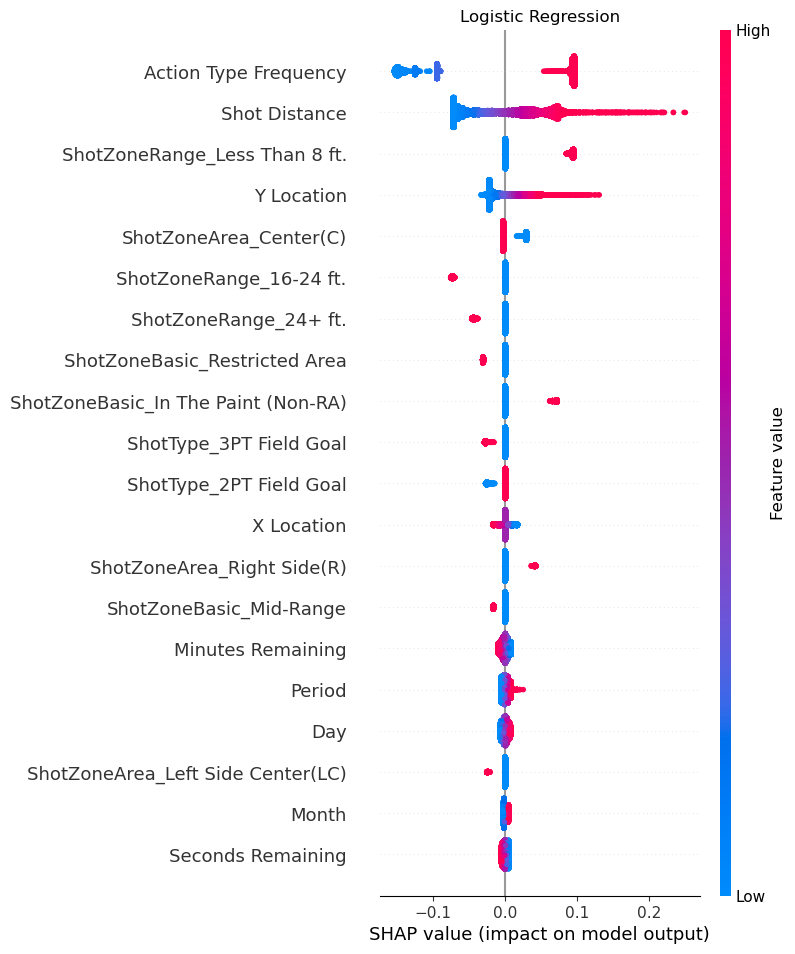

  0%|          | 0/37836 [00:00<?, ?it/s]

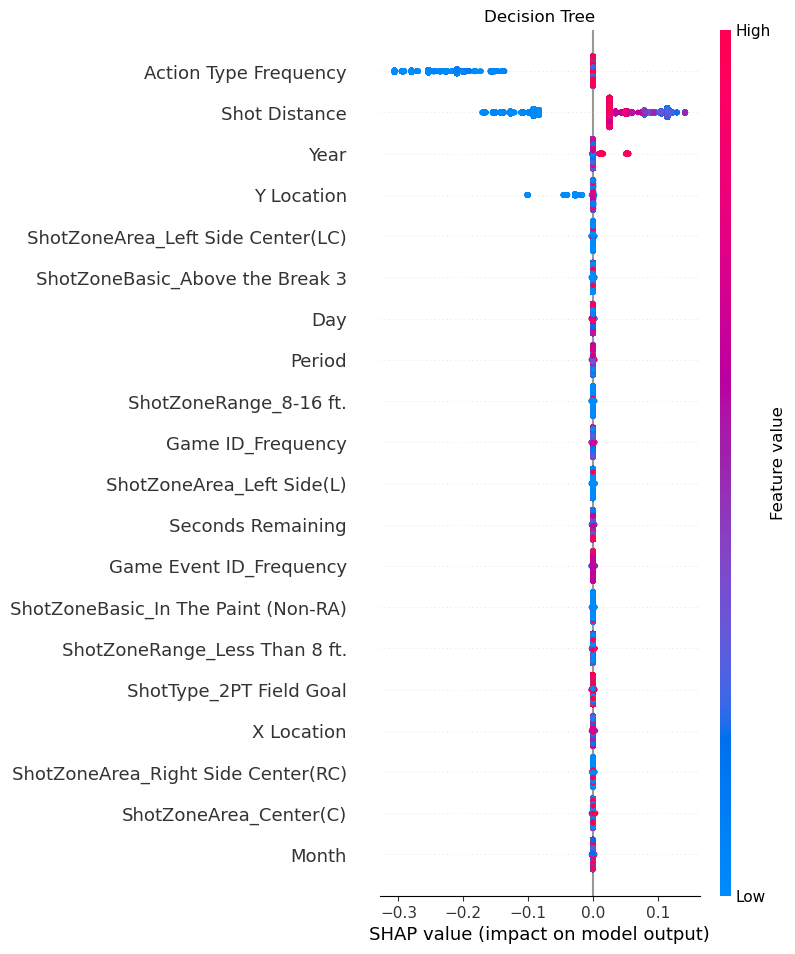

/Users/mihrandovlatyan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


  0%|          | 0/37836 [00:00<?, ?it/s]

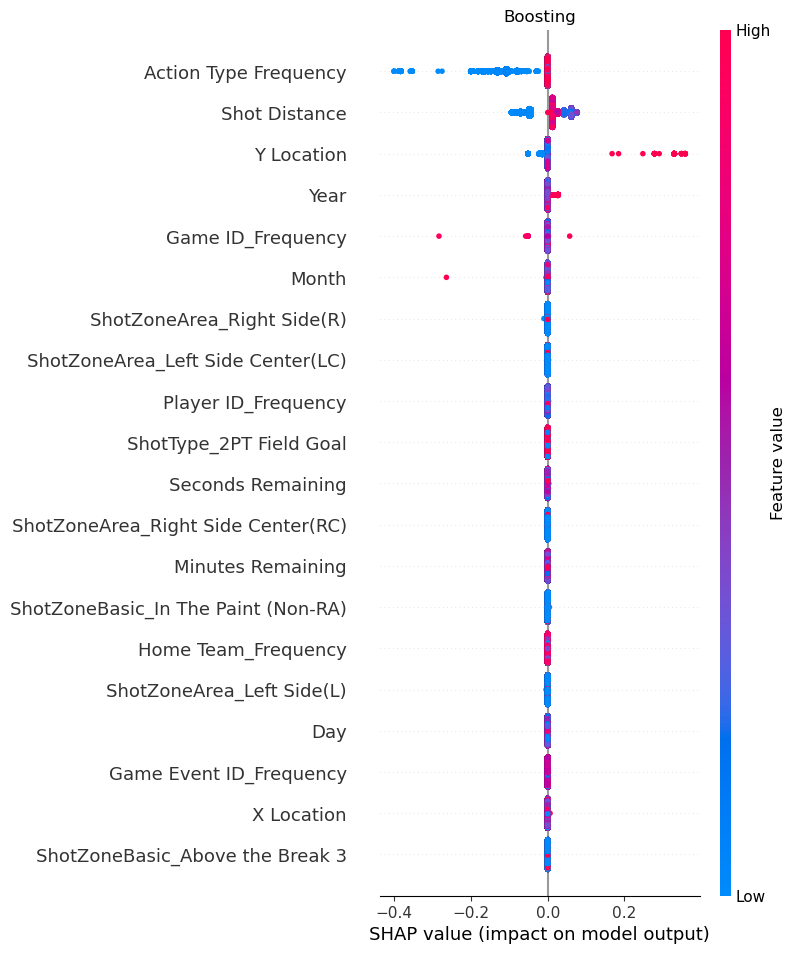

  0%|          | 0/37836 [00:00<?, ?it/s]

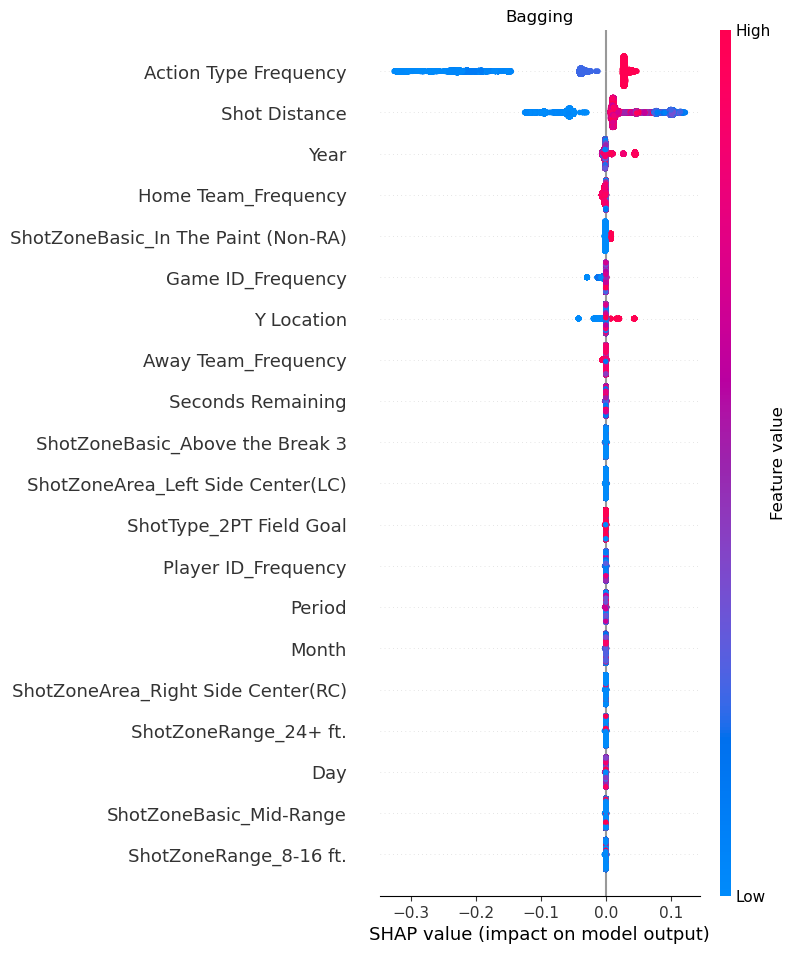

  0%|          | 0/37836 [00:00<?, ?it/s]

In [ ]:
import shap
import matplotlib.pyplot as plt

# Loop through models and generate SHAP summary plots
for model, X, title in models:
    model.fit(X, y_train)
    background_summary = shap.kmeans(X, 10)  # Adjust the number of clusters as needed
    explainer = shap.KernelExplainer(model.predict_proba, background_summary)
    shap_values = explainer(X)
    shap.summary_plot(shap_values[:, :, 0], X, show=False)
    plt.title(title)
    plt.show()


  0%|          | 0/37836 [00:00<?, ?it/s]

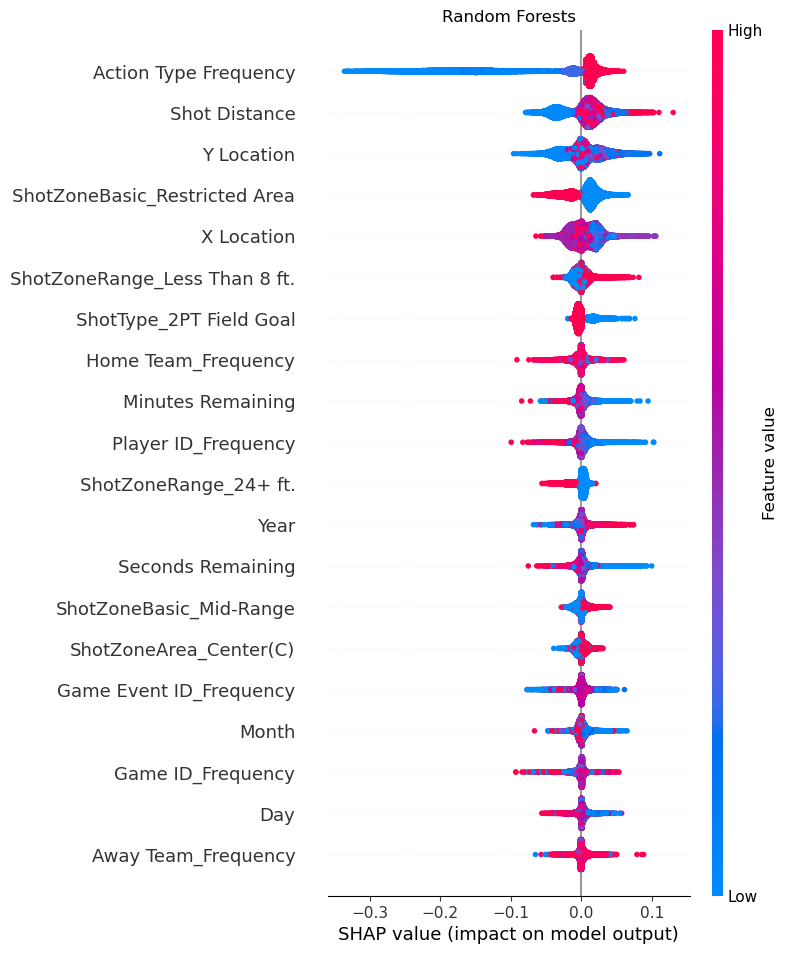

The plots reveal that across all models, the most critical features include "Action Type Frequency," "Shot Distance," "Y Location," and "ShotZoneRange_Less Than 8 ft.," which is intuitive given their relevance in basketball dynamics. Certain actions significantly increase the probability of a successful shot, while proximity to the basket strongly influences shot outcomes. 

In the Boosting model, "Y Location" emerges as the third crucial feature, with a substantial impact when considered, despite being overshadowed by the first two features. "Action Type Frequency" and "Shot Distance" consistently influence many predictions, albeit with varying degrees, while "Y Location" has not so much impact on a lot of predictions, but when it has it has a huge impact.  

In contrast, the "Random Forests" model shows relatively equal importance among all features in predicting shot outcomes.

SHAP plots help us to understand the importance of features in making predictions and provided insights into which features were most influential for each model.


# Conclusion drawn

## Difficulties encountered during the project

During our project, we encountered several challenges that affected the progress and timeline:

Dataset Size: Our dataset, consisting of approximately 5 million rows, posed challenges during model training and hyperparameter tuning. Training models, such as CNNs with hyperparameters, required several days due to the sheer volume of data. Additionally, working on a personal computer with limitations contributed to longer processing times during model training. For instance, attempting to run an SVM model led to system crashes on our MacBook due to the dataset's size.

Learning Curve: Learning new ML techniques, frameworks, or tools during the project slowed down our progress. Becoming proficient in these areas and effectively applying them took considerable time and effort.

Advanced Techniques: Certain advanced techniques, like SHAP interpretation, were not covered in our initial training. Acquiring the necessary knowledge for these methodologies involved additional self-learning and seeking external resources, which added to our project timeline.

Relevance and Performance: Ensuring the relevance of our approach required iterative work on model architectures, feature engineering techniques, and evaluation metrics. This iterative process was crucial for improving the relevance and performance of our models.

Team Coordination and Changes: Challenges in team coordination and unexpected changes within the team also impacted our project's timeline and workflow.

By addressing these challenges in our final report, we aim to provide insights into the complexities faced during the project and how we navigated them to achieve our results.

## Report

Our main contribution lies in achieving a 64% accuracy in predicting NBA shot success, surpassing existing benchmarks for similar datasets. Using SHAP values, we identified action type, player position, and shot distance as the most influential features, enhancing model interpretability. This consistent accuracy performance, especially in the stochastic domain of basketball shot attempts, underscores the effectiveness of our models. 

Our achievements include not only high accuracy prediction but also insightful feature identification, aligning with our project goals of accurate prediction and feature importance understanding. These capabilities make our models suitable for real-time decision-making in basketball analytics, historical data analysis for player performance trends, and enhancing fan engagement through data-driven insights, such as fantasy basketball platforms or interactive sports analytics dashboards.

### Model Experiments and Results

Our experiments with different models produced similar results. Our random forests model was able to achieve 63.64% accuracy.

### Experiment 1

We attempted to identify the most influential factors for predicting shot success in our analysis. Even after excluding player names from the dataset, the model still achieved an accuracy of 63.77%. This suggests that the model considered the 'player name' feature to be relatively insignificant.

However, it's widely acknowledged that different players exhibit significant variations in their shot-making abilities. Therefore, it would seem logical that the player's name should be a crucial factor. We propose utilizing a larger dataset, allowing the model more exposure to each player's historical shot-making performance. This extended data exposure would enable the model to better incorporate the player's name into its predictive capabilities.

In [45]:
from sklearn import ensemble
from joblib import dump, load
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Load the dataset
X_train, X_test, y_train, y_test = load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

# remove 'Player ID' (which corresponds to player name actually) from the dataset
X_train_processed = X_train.drop(columns=['Player ID_Frequency'], axis = 1)
X_test_processed = X_test.drop(columns=['Player ID_Frequency'], axis = 1)

# initialize RandomForests classifier with best params
# if `n_jobs = -1`, all available cores on the machine will be used
clf_rf = ensemble.RandomForestClassifier(max_depth = 10, 
                                         min_samples_leaf = 1,
                                         min_samples_split = 2,
                                         n_estimators = 10,
                                         n_jobs = -1, 
                                         random_state = 321)

# Train the random forest classifier
clf_rf.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = clf_rf.predict(X_test_processed)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set after removing 'Player ID_Frequency': {accuracy:.4f}")

Accuracy on test set after removing 'Player ID_Frequency': 0.6377


### Experiment 2

Additionally, when we removed the 'Shot Distance' factor, the model still achieved an accuracy of 63.95%. This suggests that the network could effectively compensate for the absence of 'Shot Distance' by leveraging the XY coordinates factor.

In [11]:
from sklearn import ensemble
from joblib import dump, load
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Load the dataset
X_train, X_test, y_train, y_test = load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

# remove 'Shot Distance' from the dataset
X_train_processed = X_train.drop(columns=['Shot Distance'], axis = 1)
X_test_processed = X_test.drop(columns=['Shot Distance'], axis = 1)

# initialize RandomForests classifier with best params
# if `n_jobs = -1`, all available cores on the machine will be used
clf_rf = ensemble.RandomForestClassifier(max_depth = 10, 
                                         min_samples_leaf = 1,
                                         min_samples_split = 2,
                                         n_estimators = 10,
                                         n_jobs = -1, 
                                         random_state = 321)

# Train the random forest classifier
clf_rf.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = clf_rf.predict(X_test_processed)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set after removing 'Shot Distance': {accuracy:.4f}")

Accuracy on test set after removing 'Shot Distance': 0.6395


### Experiment 3

The 'Action Type' emerged as the most critical factor for the network, as its removal resulted in a drop in accuracy to 62.07%. This finding underscores the importance of players and coaches focusing on the specific category of shots taken to significantly enhance shot success rates.

In [12]:
from sklearn import ensemble
from joblib import dump, load
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Load the dataset
X_train, X_test, y_train, y_test = load('NBA Shot Locations 1997 - 2020-Report2-train-test.joblib')

# remove 'Shot Distance' from the dataset
X_train_processed = X_train.drop(columns=['Action Type Frequency'], axis = 1)
X_test_processed = X_test.drop(columns=['Action Type Frequency'], axis = 1)

# initialize RandomForests classifier with best params
# if `n_jobs = -1`, all available cores on the machine will be used
clf_rf = ensemble.RandomForestClassifier(max_depth = 10, 
                                         min_samples_leaf = 1,
                                         min_samples_split = 2,
                                         n_estimators = 10,
                                         n_jobs = -1, 
                                         random_state = 321)

# Train the random forest classifier
clf_rf.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = clf_rf.predict(X_test_processed)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set after removing 'Action Type': {accuracy:.4f}")

Accuracy on test set after removing 'Action Type': 0.6207


## Continuation of the project

Achieving an accuracy of around 64% in NBA shot prediction analysis is typical and aligns with similar reports around 65%. This level of accuracy can be influenced by several factors: the complexity of basketball as a sport with numerous variables affecting shot outcomes, potential limitations in data quality or quantity leading to noise or biases, the crucial role of feature engineering and model choice in capturing relevant information, challenges in adapting to temporal dynamics and evolving game trends, the impact of sample size and variability on model robustness, the choice of evaluation metrics beyond accuracy to provide a nuanced view of performance, and the inherent human and random factors in basketball games that statistical models may struggle to fully account for. Overall, these factors collectively contribute to the observed accuracy levels in NBA shot prediction analyses.

For further improvement, we suggest exploring more advanced hyperparameters for random forests and deep learning models. Enhanced hyperparameter tuning, especially with access to more powerful computers and a wider range of hyperparameters, could potentially improve our prediction accuracy. For instance, increasing the training epochs for CNN models to 500 resulted in a slight improvement in accuracy, indicating that deeper exploration of hyperparameter spaces may lead to better model performance. Investing in computational resources that allow for extensive experimentation and optimization can be a key factor in achieving higher accuracy levels and refining our predictive models in sports analytics. 

Furthermore, the increased data points will allow the network to train for longer and further improve its accuracy.

## Bibliography

[1] Made With ML: https://madewithml.com

[2] A game theoretic approach to explain the output of any machine learning model: https://github.com/shap/shap

[3] NBA Shot Analysis: https://www.kaggle.com/code/nbuhagiar/nba-shot-analysis

[4] Evaluating the effectiveness of machine learning models for performance forecasting in basketball: https://link.springer.com/article/10.1007/s10115-024-02092-9

The code used throughout this paper can be found here:
https://github.com/DataScientest-Studio/feb24_bds_int_nba